In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Einlesen und Erstprüfung

In [2]:
df = pd.read_csv("household_power_consumption.txt", sep=";")

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_26136\2456779612.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", sep=";")


In [3]:
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
features = [
    "Sub_metering_1", "Global_intensity", "Sub_metering_2",
    "Sub_metering_3", "Global_reactive_power", "Global_active_power", "Voltage"
]

# --- Nicht-numerische Werte in NaN umwandeln und in float konvertieren ---
for feature in features:
    df[feature] = pd.to_numeric(df[feature], errors="coerce")

In [7]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## Datum prüfen

In [8]:
# Schritt 1: Versuche, aus Date und Time eine echte Datetime-Spalte zu bauen
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors="coerce")

# Schritt 2: Zeige ungültige Datums-/Zeit-Einträge an
invalid_datetime = df[df["Datetime"].isna()]

print(f"Anzahl ungültiger Datums-/Zeitwerte: {len(invalid_datetime)}")
print(invalid_datetime[["Date", "Time"]].head(10))

Anzahl ungültiger Datums-/Zeitwerte: 0
Empty DataFrame
Columns: [Date, Time]
Index: []


In [9]:
duplicate_times = df["Datetime"].duplicated().sum()
print(f"Anzahl doppelter Zeitstempel: {duplicate_times}")

Anzahl doppelter Zeitstempel: 0


In [10]:
is_sorted = df["Datetime"].is_monotonic_increasing
print(f"Daten chronologisch sortiert? {is_sorted}")

Daten chronologisch sortiert? True


## Daten prüfen

In [11]:
# Liste der Spalten, die in float umgewandelt werden sollen
float_cols = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2", "Voltage"
]

df_boxplot = df.copy()

# Umwandlung mit Fehlerbehandlung (nicht konvertierbare Werte zu NaN)
for col in float_cols:
    df_boxplot[col] = pd.to_numeric(df_boxplot[col], errors="coerce")


In [12]:
df_boxplot.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [13]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

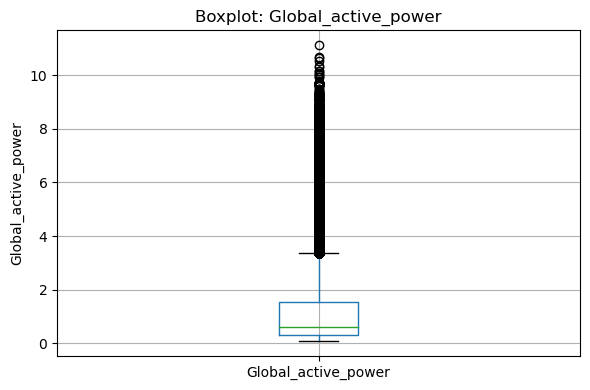

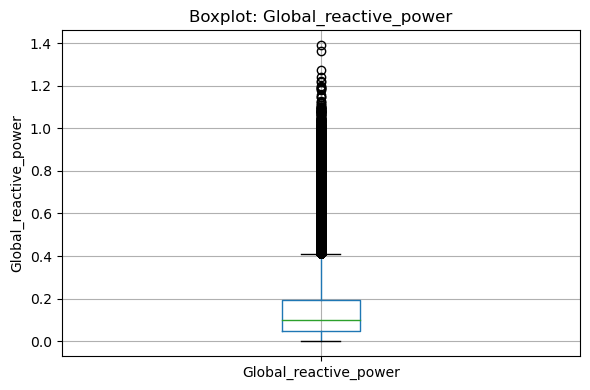

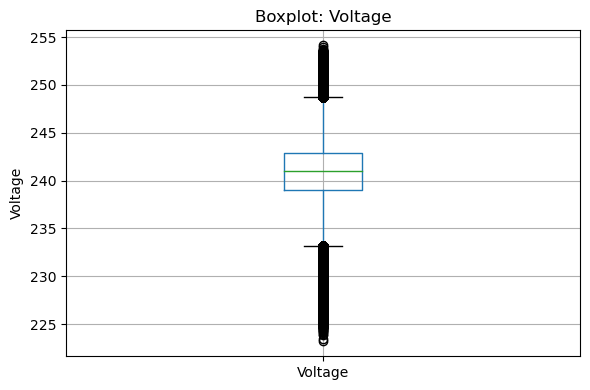

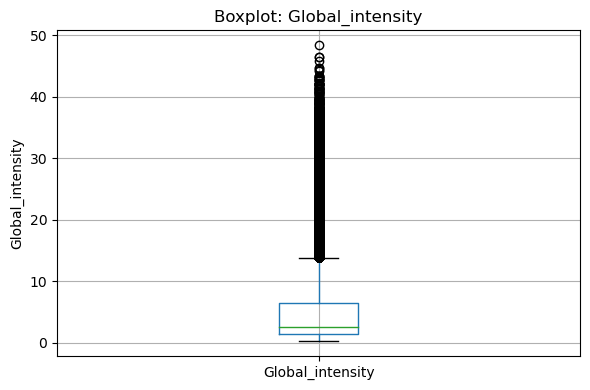

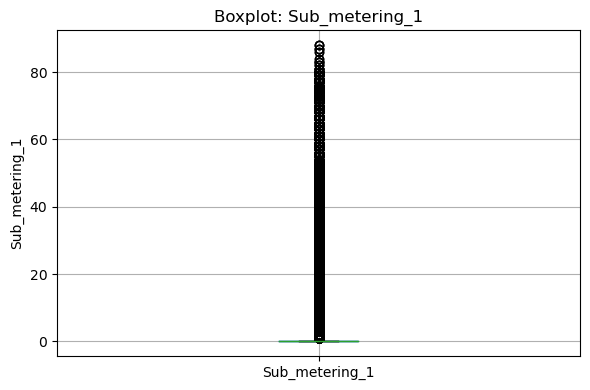

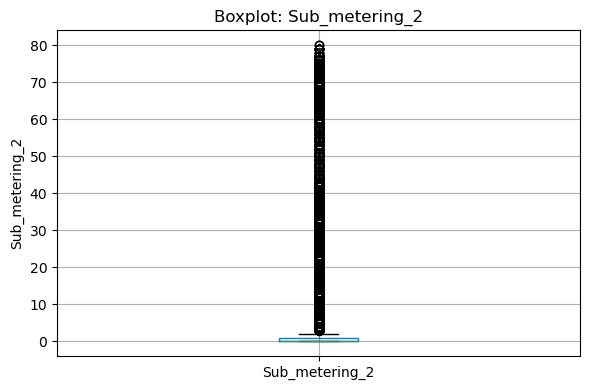

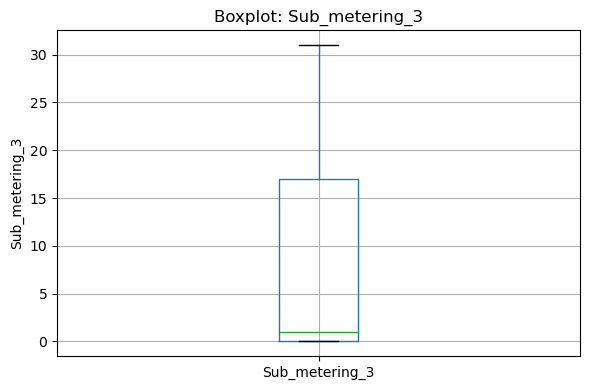

In [14]:
# Schleife: Für jede Spalte ein einzelner Boxplot
columns_to_plot = ["Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"]

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    df_boxplot.boxplot(column=col)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [15]:
#"Global_intensity" "Global_reactive_power", "Global_active_power"

In [16]:
#df["Global_active_power"].value_counts()

### NaN werte in Sub_metering_3 prüfen

In [17]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [18]:
# Zeige Zeitstempel mit fehlenden Werten
missing_times = df[df["Sub_metering_3"].isna()][["Date", "Time", "Datetime"]]
print(missing_times.head(10))


              Date      Time            Datetime
6839    21/12/2006  11:23:00 2006-12-21 11:23:00
6840    21/12/2006  11:24:00 2006-12-21 11:24:00
19724   30/12/2006  10:08:00 2006-12-30 10:08:00
19725   30/12/2006  10:09:00 2006-12-30 10:09:00
41832    14/1/2007  18:36:00 2007-01-14 18:36:00
61909    28/1/2007  17:13:00 2007-01-28 17:13:00
98254    22/2/2007  22:58:00 2007-02-22 22:58:00
98255    22/2/2007  22:59:00 2007-02-22 22:59:00
142588   25/3/2007  17:52:00 2007-03-25 17:52:00
190497   28/4/2007  00:21:00 2007-04-28 00:21:00


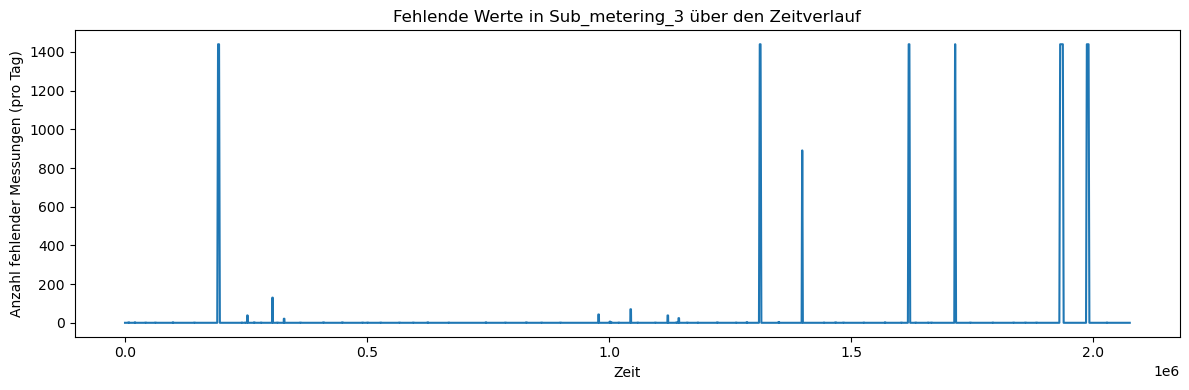

In [19]:
# Sicherstellen, dass Index korrekt ist
df_Sub_metering_3 = df.sort_index()

# Fehlende Werte als binär markieren
df_Sub_metering_3["Sub3_missing"] = df_Sub_metering_3["Sub_metering_3"].isna().astype(int)

# Gleitende Summe im Tagesfenster (1440 Minuten)
rolling_missing = df_Sub_metering_3["Sub3_missing"].rolling(window=1440, min_periods=1).sum()

# Plot
plt.figure(figsize=(12, 4))
rolling_missing.plot()
plt.title("Fehlende Werte in Sub_metering_3 über den Zeitverlauf")
plt.ylabel("Anzahl fehlender Messungen (pro Tag)")
plt.xlabel("Zeit")
plt.tight_layout()
plt.show()

In [20]:
# Nur Zeilen mit gültigem Zeitstempel
df_valid = df.dropna(subset=["Datetime"]).copy()

# Neue Spalte: True, wenn Sub_metering_3 fehlt
df_valid["Fehlt_Sub3"] = df_valid["Sub_metering_3"].isna()

# Gruppenwechsel erkennen: Jede zusammenhängende True- oder False-Gruppe bekommt eine eigene Nummer
df_valid["Gruppe"] = (df_valid["Fehlt_Sub3"] != df_valid["Fehlt_Sub3"].shift()).cumsum()

# Nur Gruppen betrachten, wo Sub_metering_3 fehlt
fehlgruppen = df_valid[df_valid["Fehlt_Sub3"]].groupby("Gruppe")

# Start, Ende, Anzahl Messpunkte, Dauer berechnen
fehlzeiten = fehlgruppen.agg({
    "Datetime": ["min", "max", "count"]
}).reset_index(drop=True)

# Spalten umbenennen
fehlzeiten.columns = ["Start", "Ende", "Anzahl_Messpunkte"]

# Dauer berechnen (als Zeitspanne)
fehlzeiten["Dauer"] = fehlzeiten["Ende"] - fehlzeiten["Start"]

# Ausgabe anzeigen
print("Fehlende Zeiträume für Sub_metering_3:")
print(fehlzeiten)

Fehlende Zeiträume für Sub_metering_3:
                 Start                Ende  Anzahl_Messpunkte           Dauer
0  2006-12-21 11:23:00 2006-12-21 11:24:00                  2 0 days 00:01:00
1  2006-12-30 10:08:00 2006-12-30 10:09:00                  2 0 days 00:01:00
2  2007-01-14 18:36:00 2007-01-14 18:36:00                  1 0 days 00:00:00
3  2007-01-28 17:13:00 2007-01-28 17:13:00                  1 0 days 00:00:00
4  2007-02-22 22:58:00 2007-02-22 22:59:00                  2 0 days 00:01:00
..                 ...                 ...                ...             ...
66 2010-06-29 16:53:00 2010-06-29 16:53:00                  1 0 days 00:00:00
67 2010-07-15 14:33:00 2010-07-15 14:33:00                  1 0 days 00:00:00
68 2010-08-17 21:02:00 2010-08-22 21:27:00               7226 5 days 00:25:00
69 2010-09-25 03:56:00 2010-09-28 19:12:00               5237 3 days 15:16:00
70 2010-10-24 15:35:00 2010-10-24 15:35:00                  1 0 days 00:00:00

[71 rows x 4 columns]


In [21]:
# Häufigkeit von Lückenlängen (Anzahl Messpunkte)
luecken_statistik = fehlzeiten["Anzahl_Messpunkte"].value_counts().sort_index()

print("Häufigkeit der Lückenlängen in Minuten:")
print(luecken_statistik)


Häufigkeit der Lückenlängen in Minuten:
1       38
2       14
3        2
4        1
6        1
21       1
24       1
33       1
38       1
43       1
47       1
70       1
83       1
891      1
2027     1
3129     1
3305     1
3723     1
5237     1
7226     1
Name: Anzahl_Messpunkte, dtype: int64


## Gesamtverteilung Features 

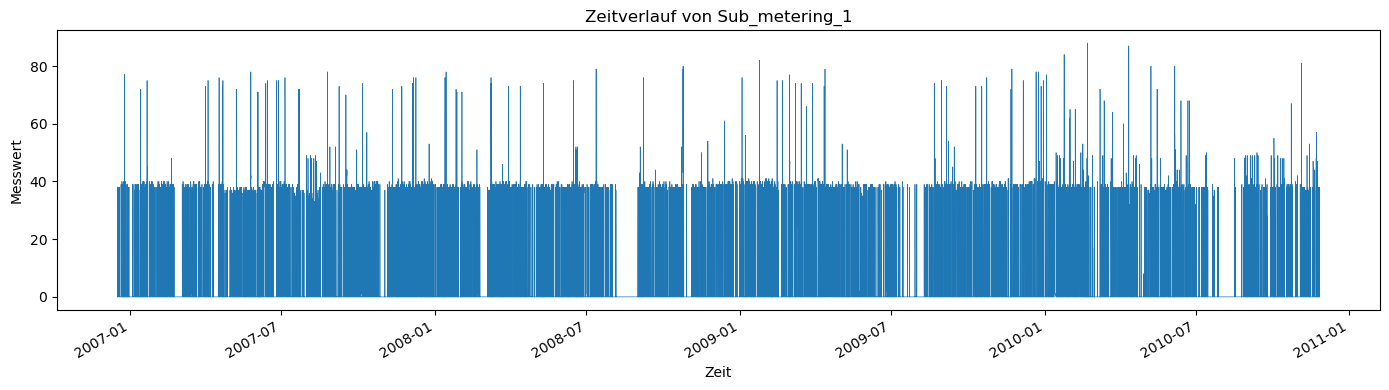

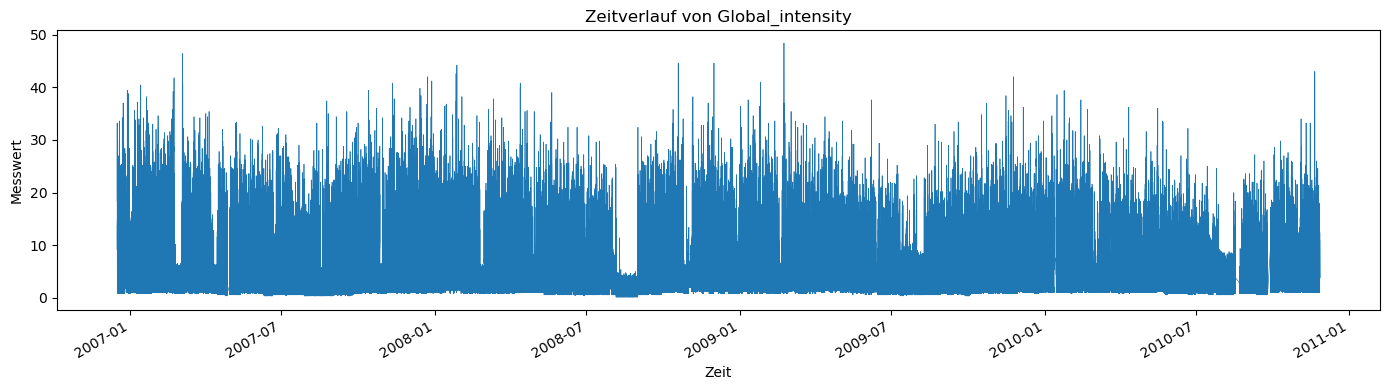

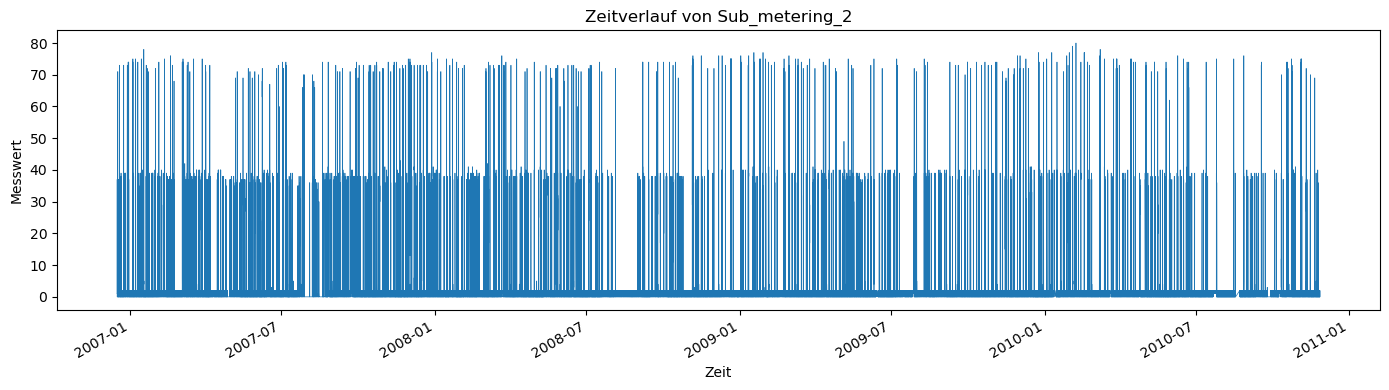

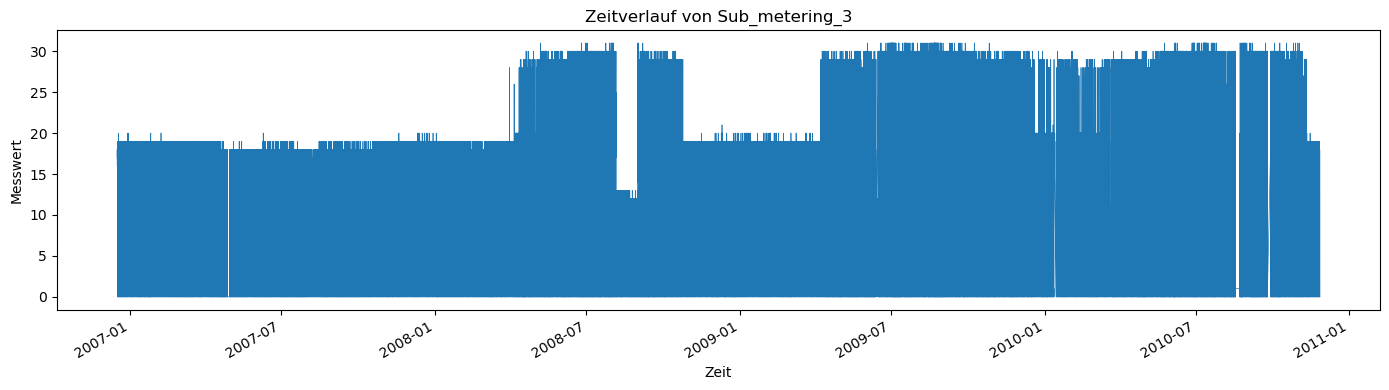

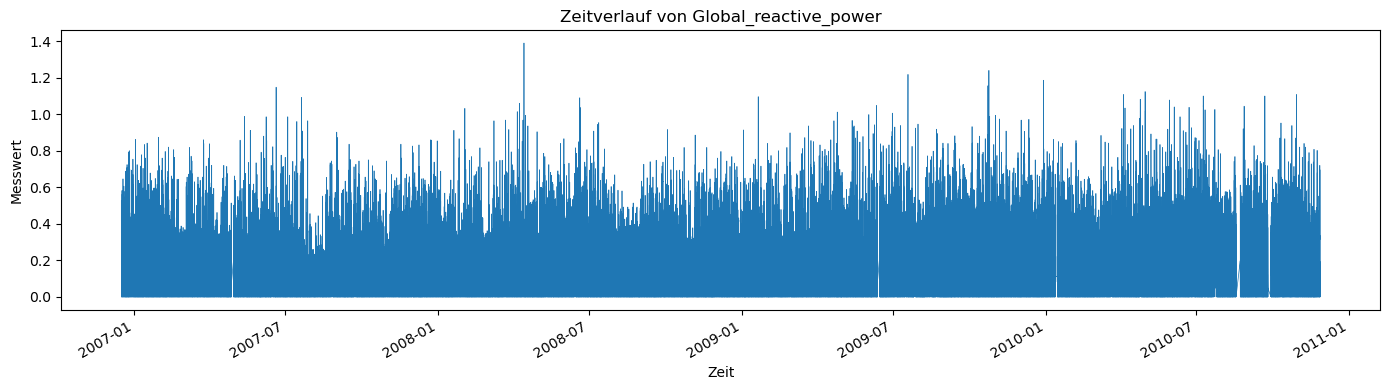

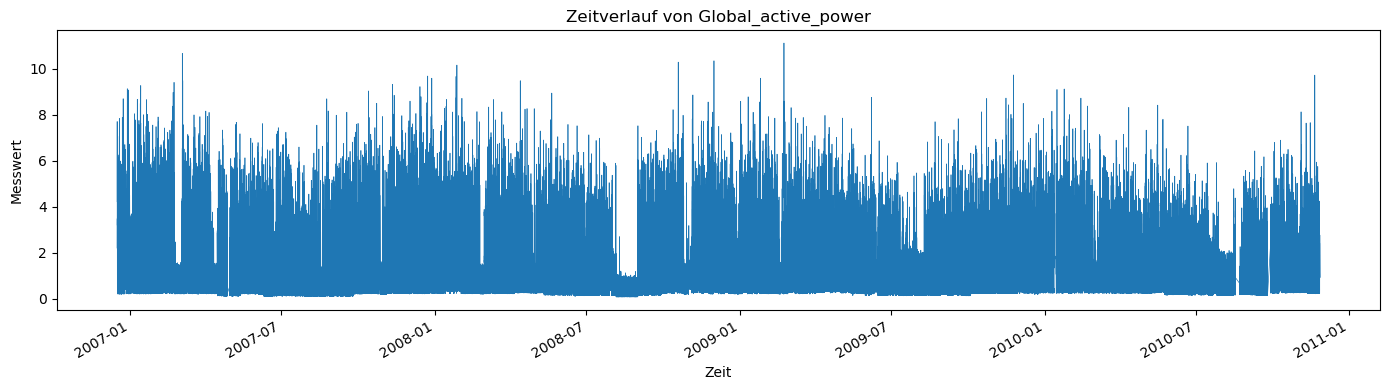

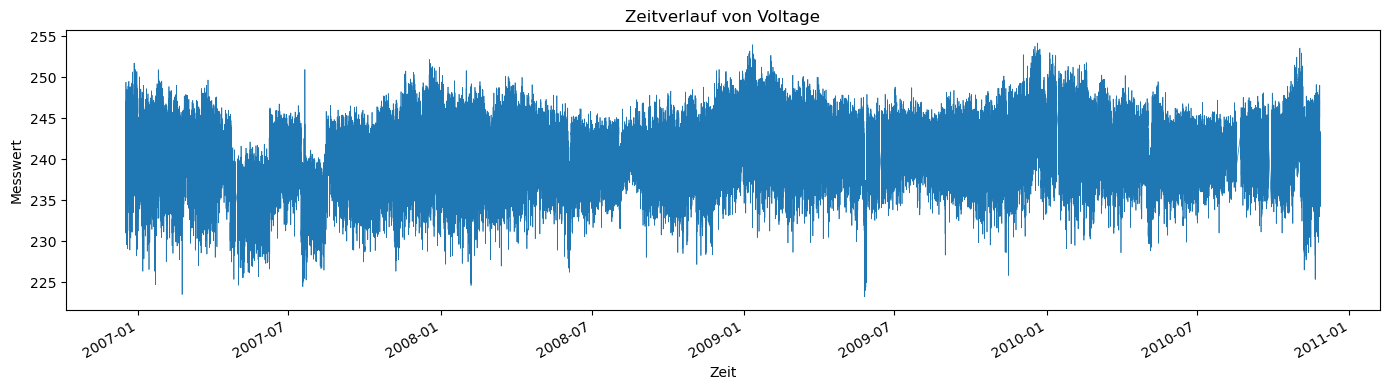

In [22]:
# Arbeitskopie erstellen, Original bleibt unverändert
df_plot = df.copy()

# Spaltennamen bereinigen
df_plot.columns = df_plot.columns.str.strip()

# Spaltenliste, die geplottet werden sollen (nur wenn vorhanden)
cols_to_plot = [
    col for col in ["Sub_metering_1", "Global_intensity", "Sub_metering_2",
                    "Sub_metering_3", "Global_reactive_power", "Global_active_power", "Voltage"]
    if col in df_plot.columns
]

# Nur diese Spalten auswählen
df_plot = df_plot[cols_to_plot + (["Datetime"] if "Datetime" in df_plot.columns else [])]

# Sicherstellen, dass sie numerisch sind
for col in cols_to_plot:
    df_plot[col] = pd.to_numeric(df_plot[col], errors="coerce")

# Index setzen, falls noch nicht geschehen
if df_plot.index.name != "Datetime" and "Datetime" in df_plot.columns:
    df_plot = df_plot.set_index("Datetime")

# Sortieren und NaNs entfernen
df_plot = df_plot.sort_index()
df_plot = df_plot[cols_to_plot].dropna()

# Einzelplots
for col in df_plot.columns:
    plt.figure(figsize=(14, 4))
    df_plot[col].plot(linewidth=0.5)
    plt.title(f"Zeitverlauf von {col}")
    plt.xlabel("Zeit")
    plt.ylabel("Messwert")
    plt.tight_layout()
    plt.show()


## Feature Engineering

### Tageszeiten

In [23]:
# Tageszeit zuweisen
df["Tageszeit"] = df["Datetime"].dt.hour.apply(lambda h: 
    "Morgens" if 6 <= h < 12 else 
    "Mittags" if 12 <= h < 18 else 
    "Abends" if 18 <= h < 22 else 
    "Nachts"
)

# Datum extrahieren
df["Datum"] = df["Datetime"].dt.date

# Relevante Features
features = ["Sub_metering_1", "Global_intensity", "Sub_metering_2", 
            "Sub_metering_3", "Global_reactive_power", "Global_active_power", "Voltage"]

# Nur gültige Werte
df_clean = df.dropna()

# Tagesdurchschnitt pro Tageszeit und Datum
df_daily = df_clean.groupby(["Datum", "Tageszeit"])[features].mean().reset_index()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
 10  Tageszeit              object        
 11  Datum                  object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 190.0+ MB


#### Morgens

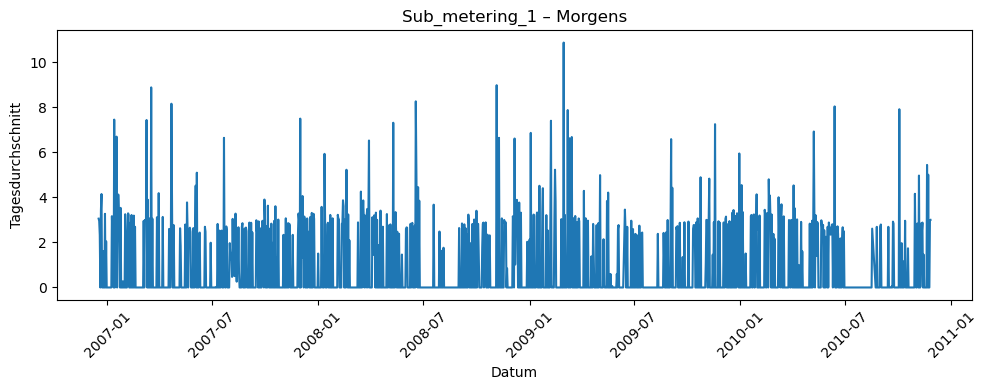

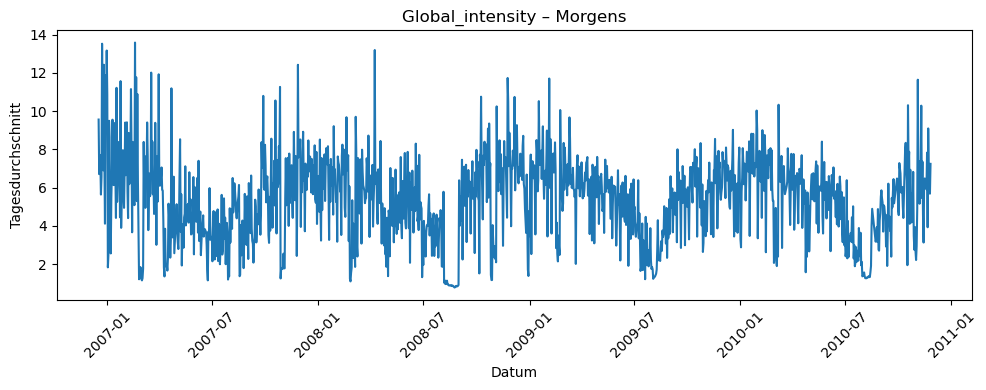

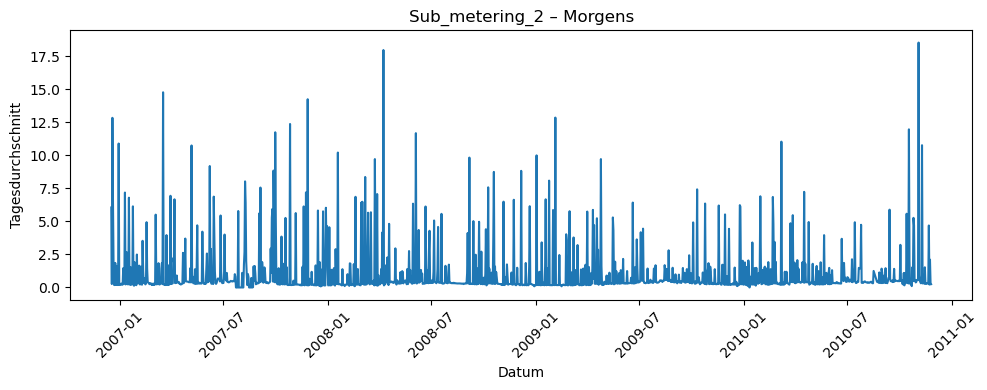

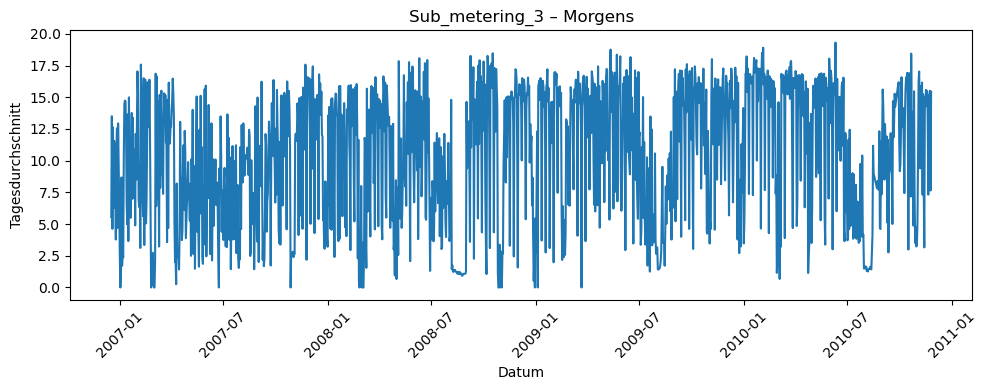

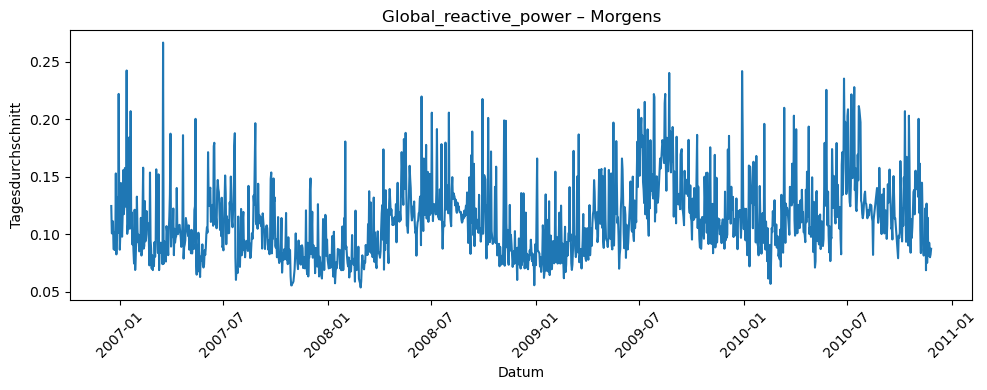

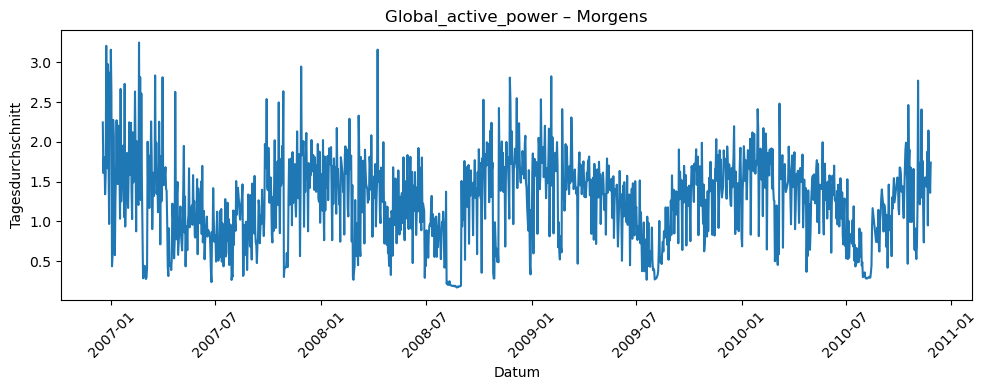

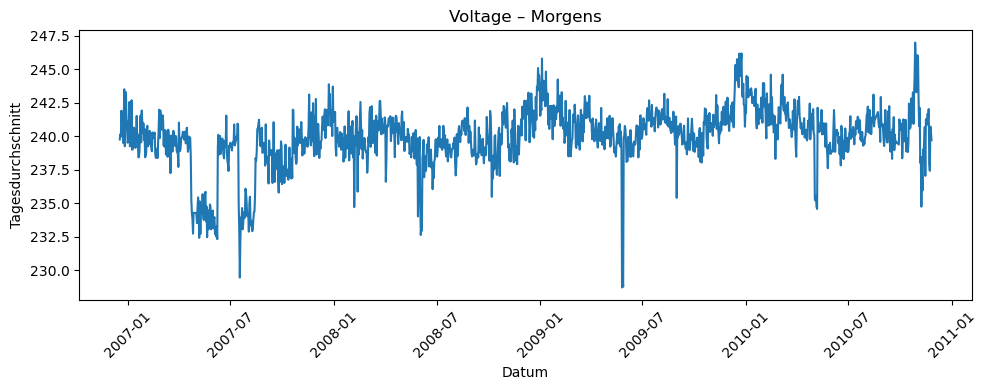

In [25]:
tageszeit = "Morgens"
df_plot = df_daily[df_daily["Tageszeit"] == tageszeit]

for feature in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df_plot["Datum"], df_plot[feature])
    plt.title(f"{feature} – {tageszeit}")
    plt.xlabel("Datum")
    plt.ylabel("Tagesdurchschnitt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Mittags

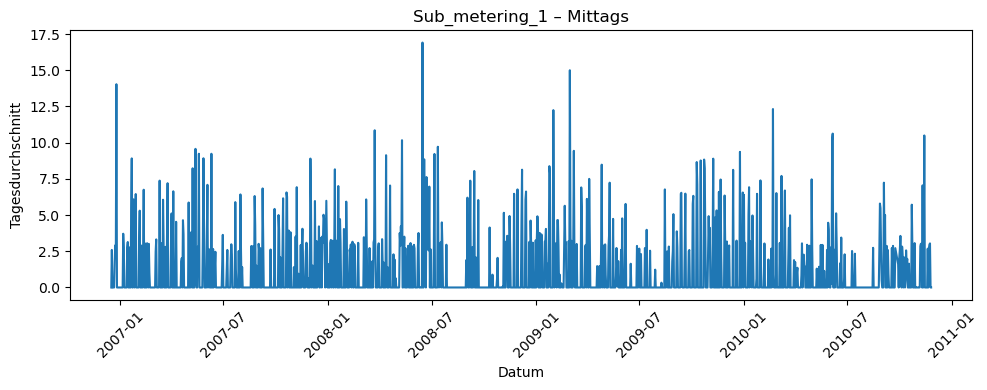

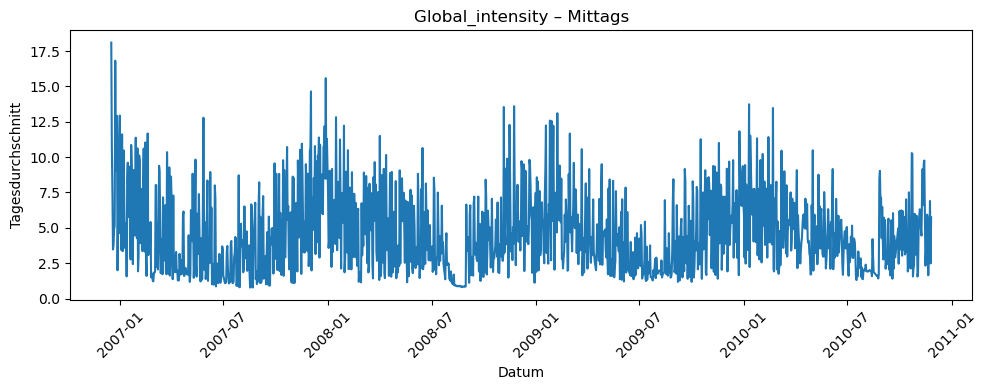

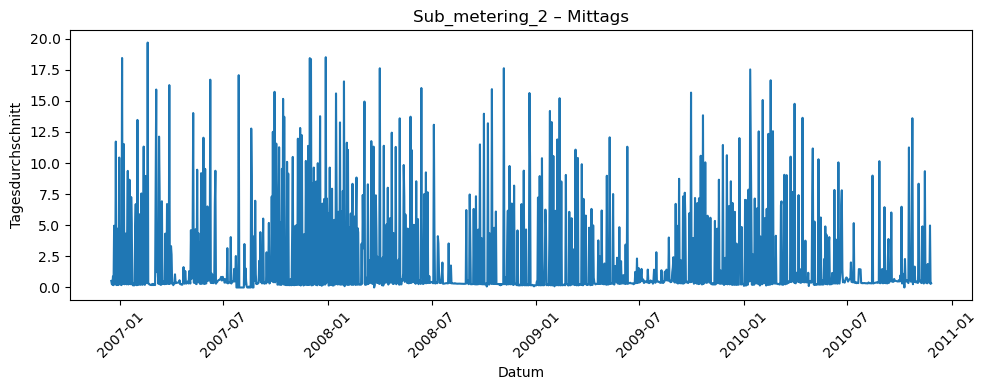

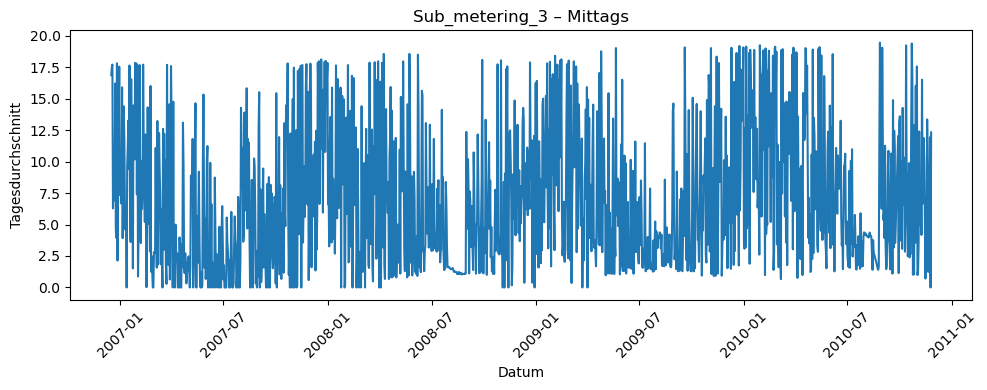

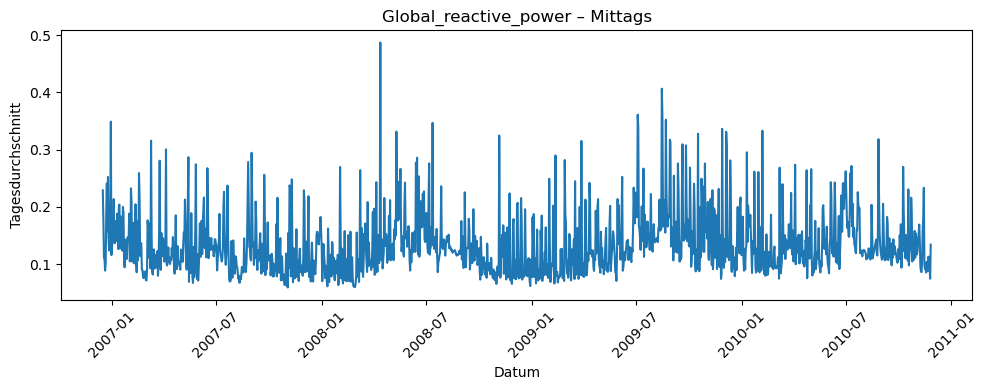

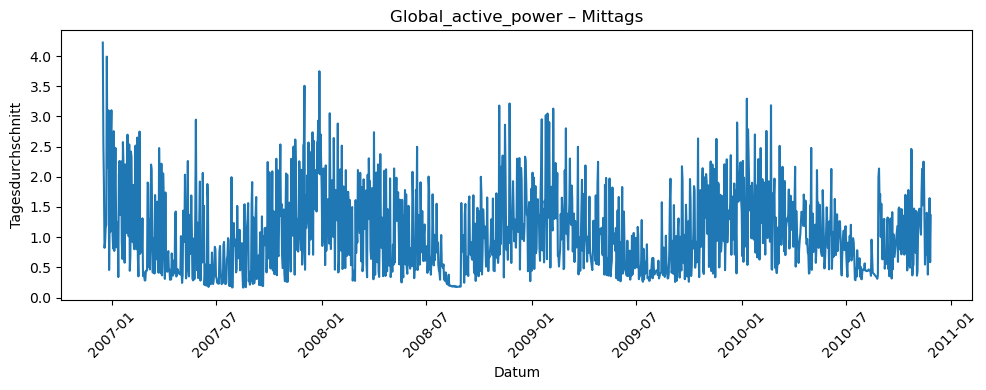

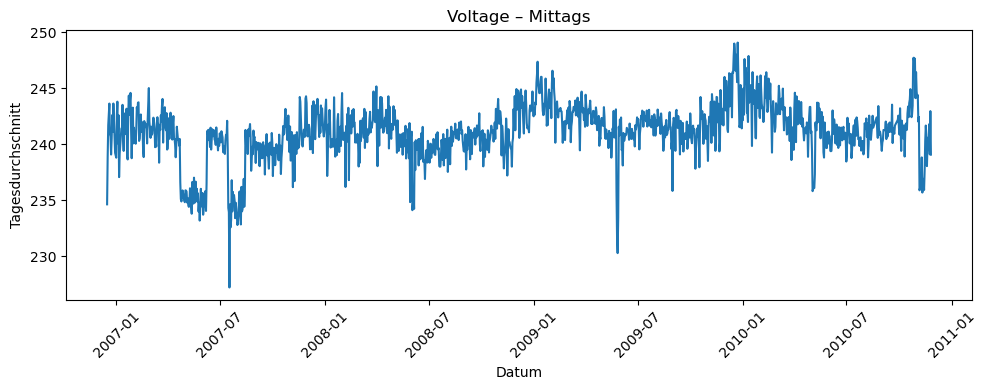

In [26]:
tageszeit = "Mittags"
df_plot = df_daily[df_daily["Tageszeit"] == tageszeit]

for feature in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df_plot["Datum"], df_plot[feature])
    plt.title(f"{feature} – {tageszeit}")
    plt.xlabel("Datum")
    plt.ylabel("Tagesdurchschnitt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Abends

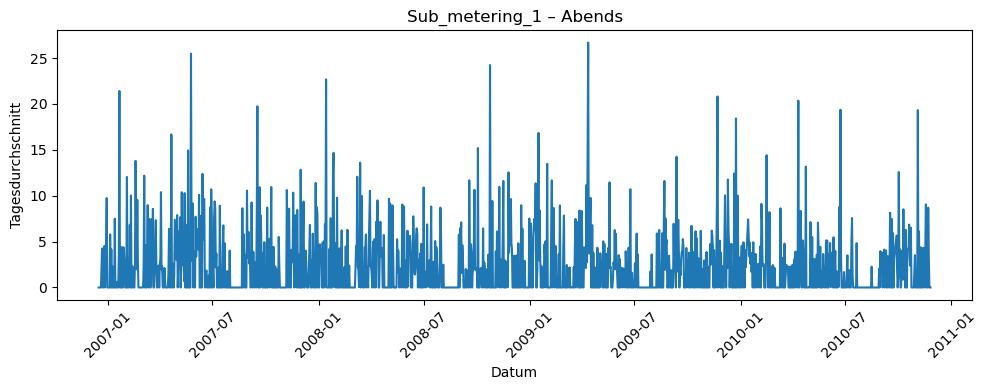

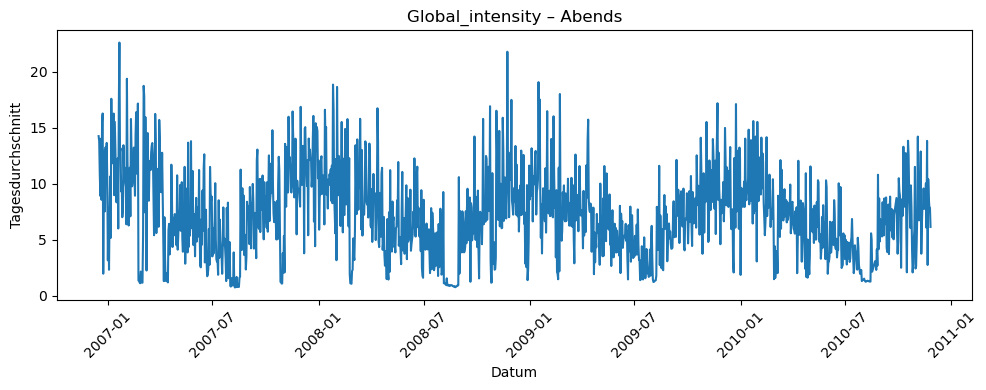

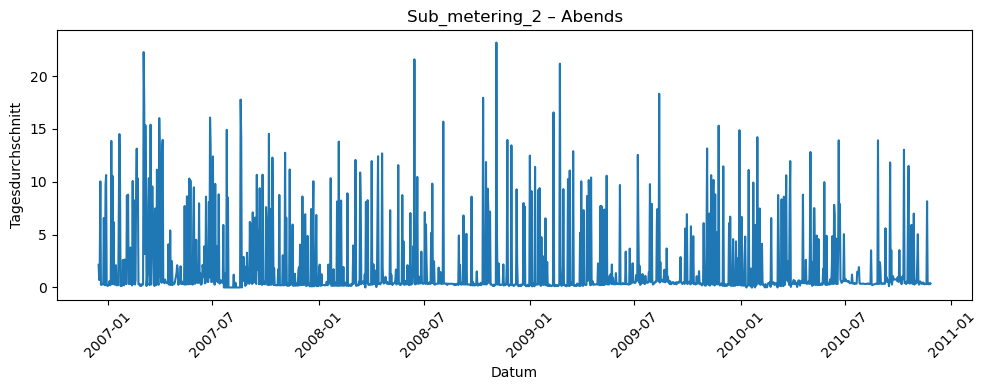

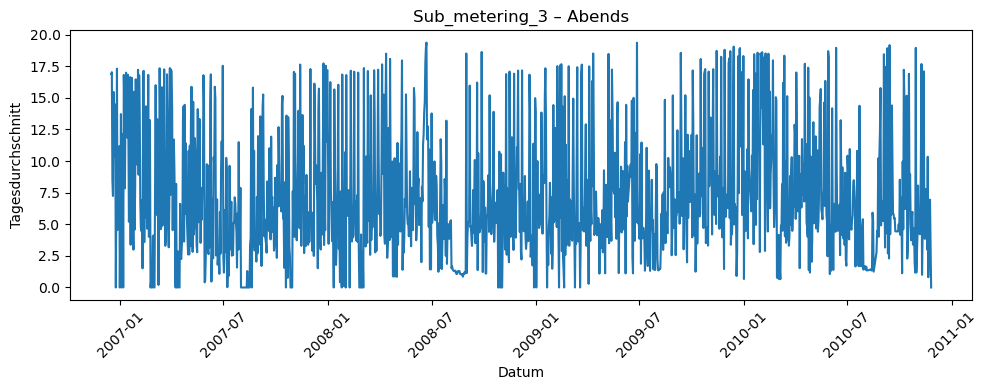

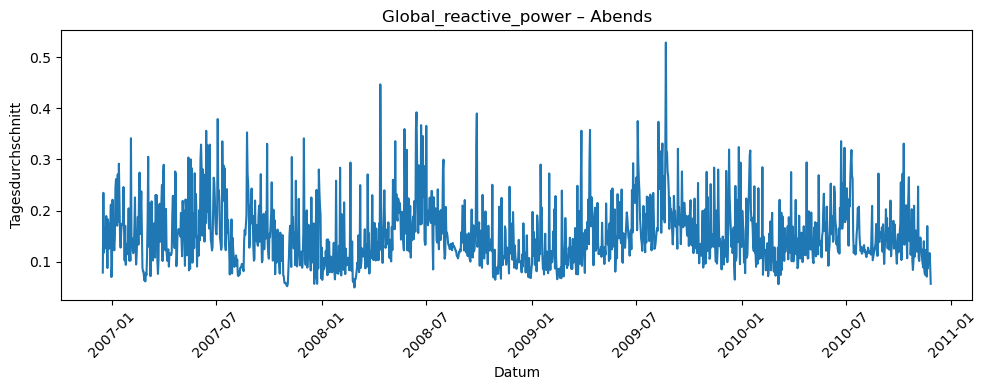

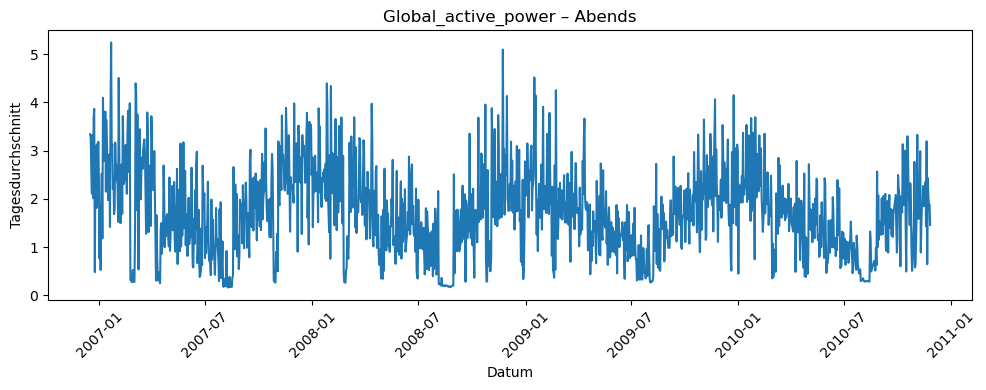

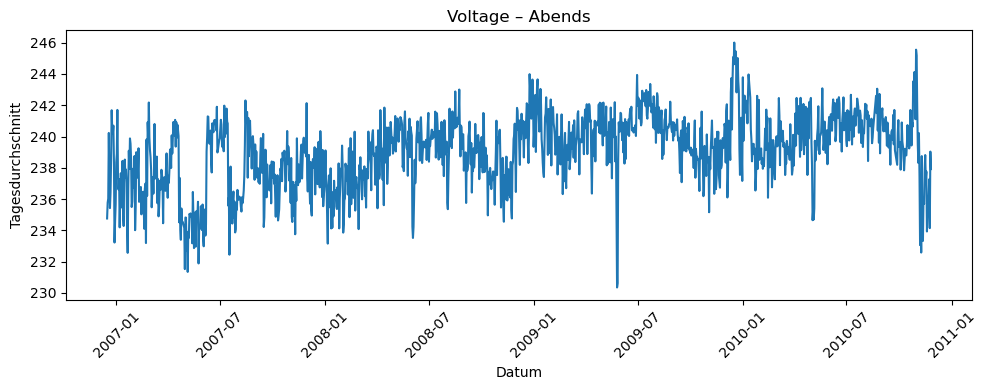

In [27]:
tageszeit = "Abends"
df_plot = df_daily[df_daily["Tageszeit"] == tageszeit]

for feature in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df_plot["Datum"], df_plot[feature])
    plt.title(f"{feature} – {tageszeit}")
    plt.xlabel("Datum")
    plt.ylabel("Tagesdurchschnitt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Nachts

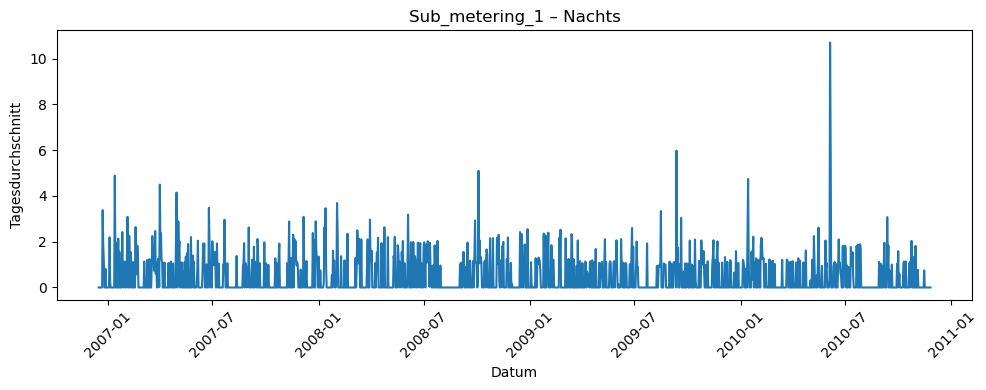

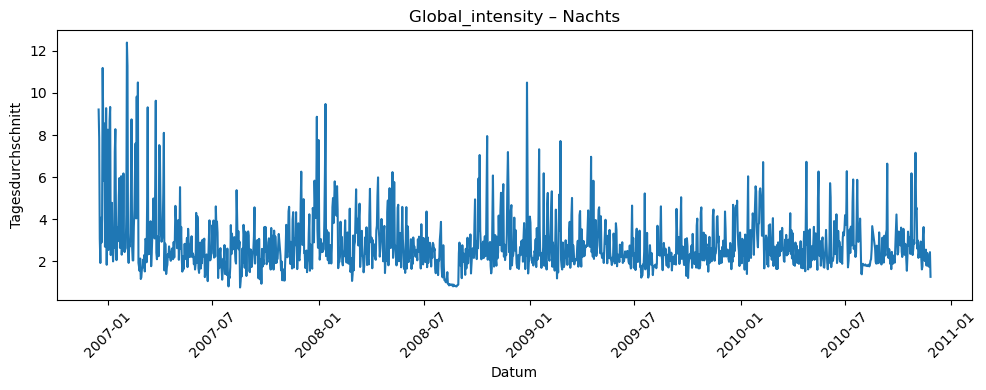

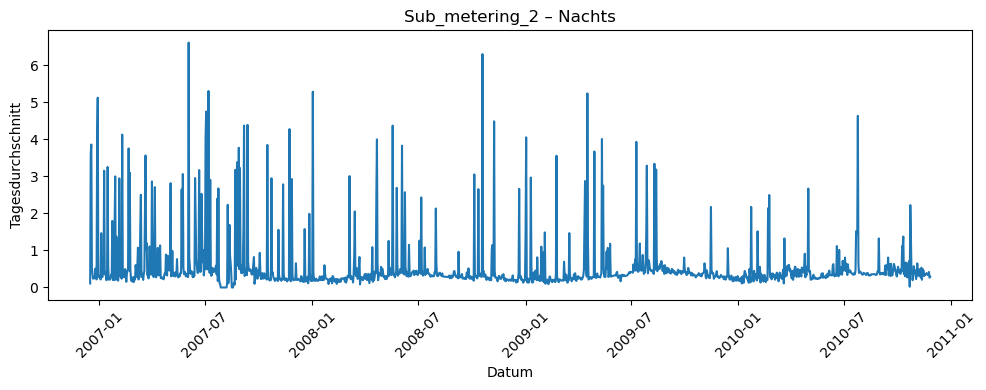

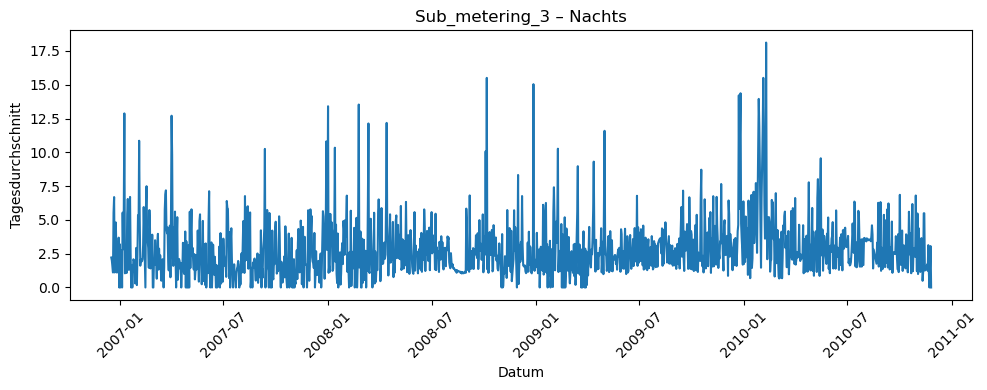

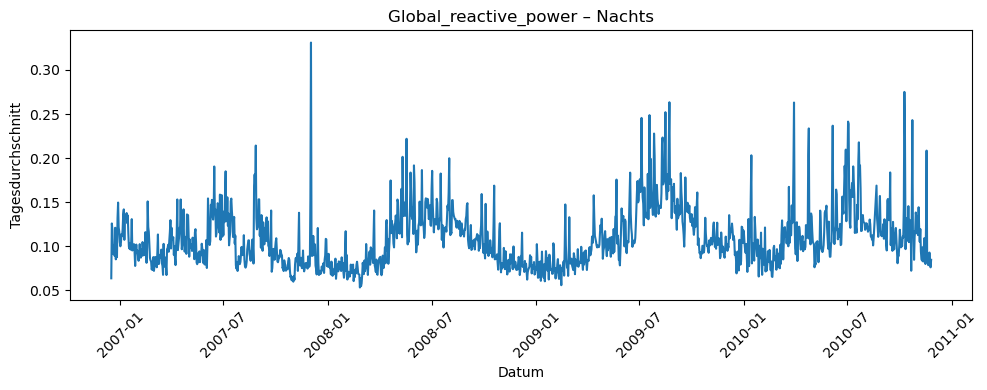

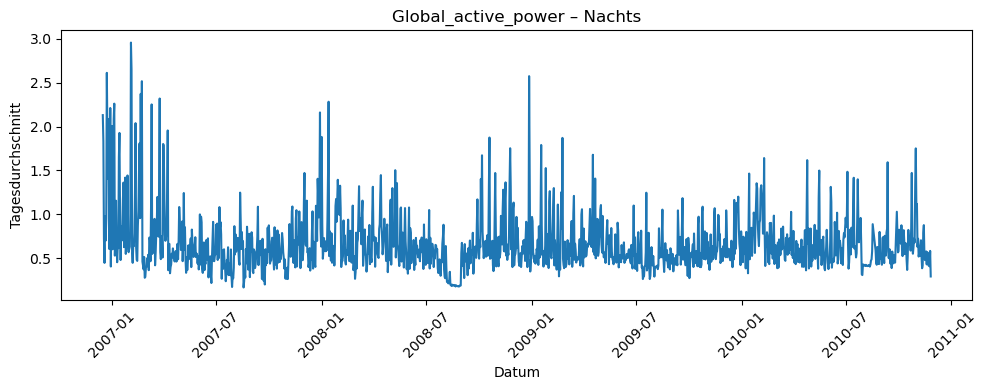

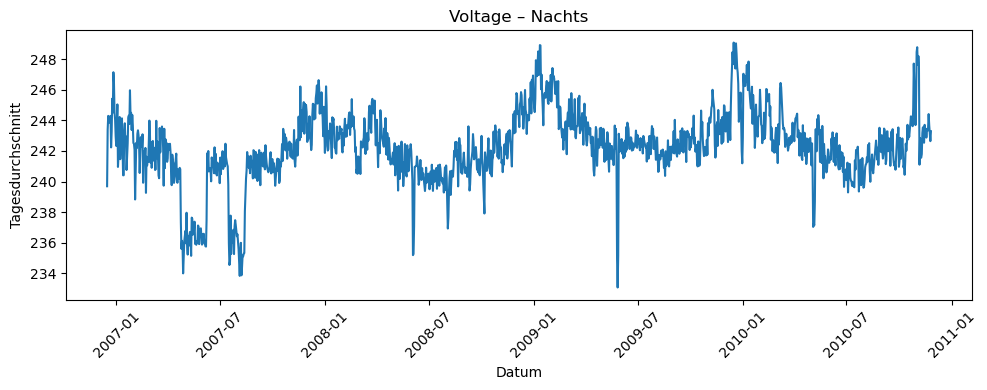

In [28]:
tageszeit = "Nachts"
df_plot = df_daily[df_daily["Tageszeit"] == tageszeit]

for feature in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df_plot["Datum"], df_plot[feature])
    plt.title(f"{feature} – {tageszeit}")
    plt.xlabel("Datum")
    plt.ylabel("Tagesdurchschnitt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Gesamtüberblick Tageszeiten

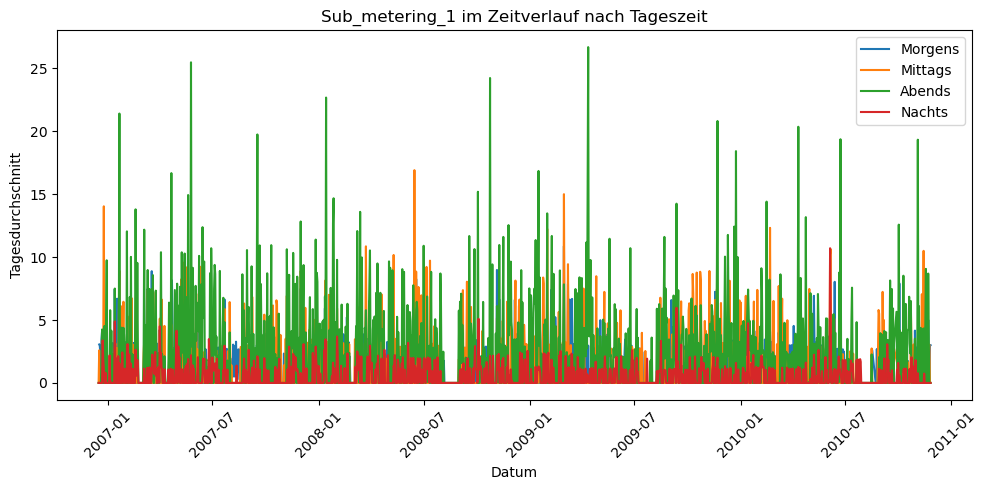

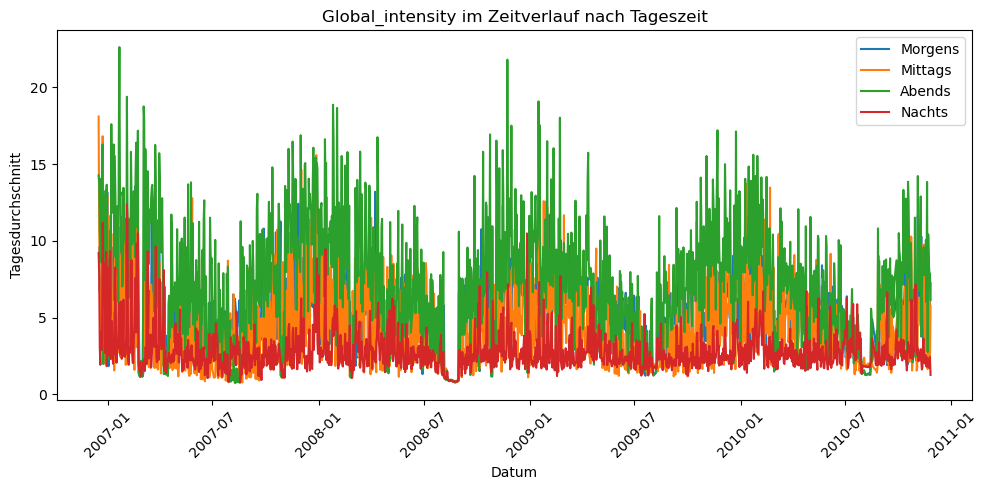

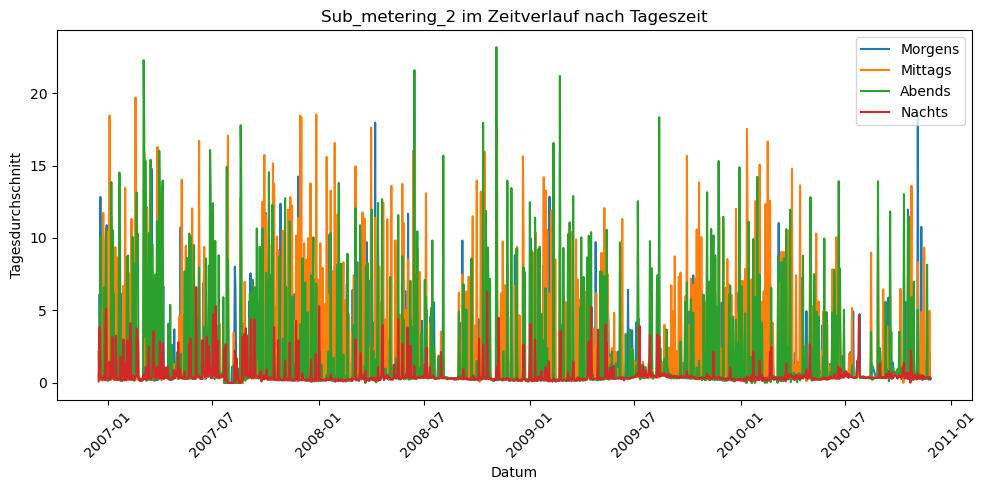

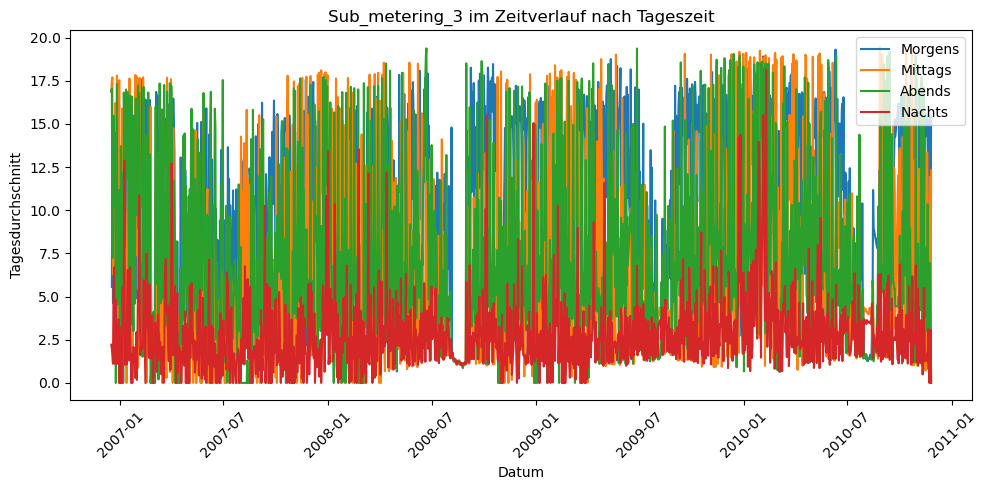

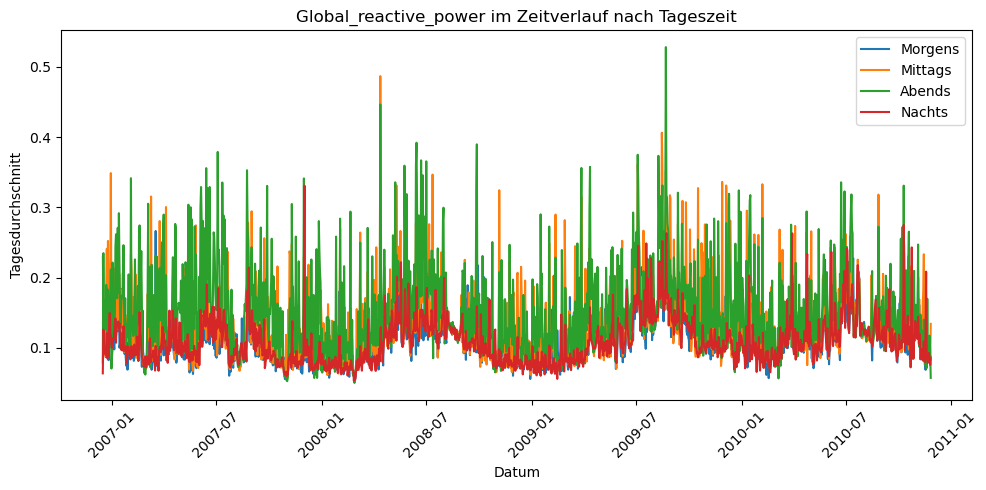

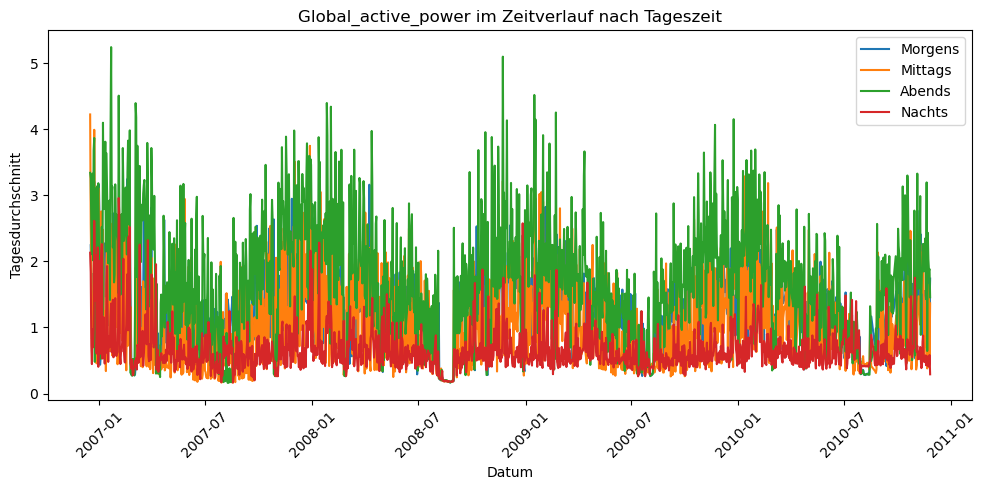

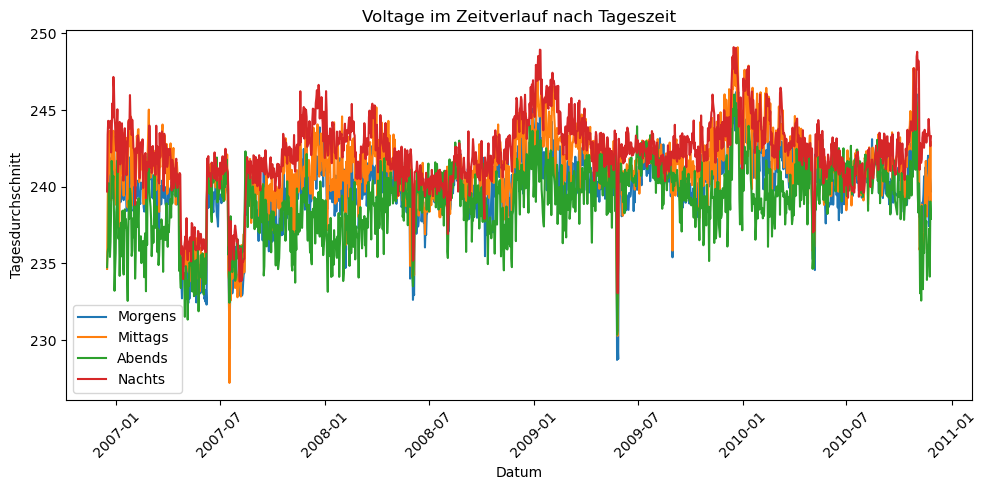

In [29]:
for feature in features:
    plt.figure(figsize=(10, 5))
    for tageszeit in ["Morgens", "Mittags", "Abends", "Nachts"]:
        df_plot = df_daily[df_daily["Tageszeit"] == tageszeit]
        plt.plot(df_plot["Datum"], df_plot[feature], label=tageszeit)
    
    plt.title(f"{feature} im Zeitverlauf nach Tageszeit")
    plt.xlabel("Datum")
    plt.ylabel("Tagesdurchschnitt")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [30]:
features =["Sub_metering_1", "Global_intensity", "Sub_metering_2",
                    "Sub_metering_3", "Global_reactive_power", "Global_active_power"]

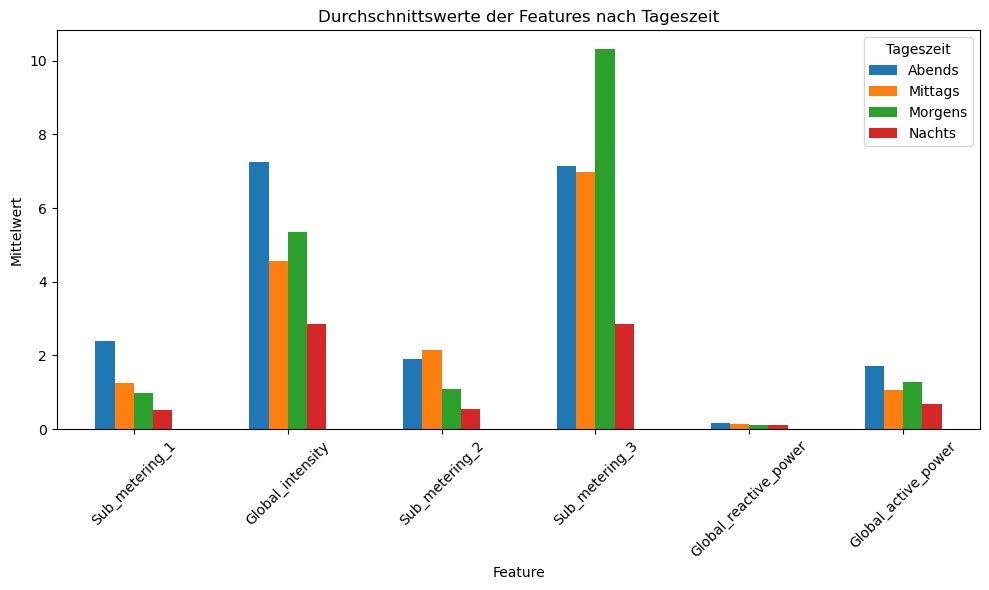

In [31]:
df_means = df_daily.groupby("Tageszeit")[features].mean().transpose()
#display(df_means)

df_means.plot(kind="bar", figsize=(10, 6))
plt.title("Durchschnittswerte der Features nach Tageszeit")
plt.ylabel("Mittelwert")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(title="Tageszeit")
plt.tight_layout()
plt.show()


#### Wochenende

In [32]:
df["Wochentag"] = df["Datetime"].dt.weekday
df["Wochenende"] = df["Wochentag"].apply(lambda x: "Ja" if x >= 5 else "Nein")

In [33]:
vergleich = df.groupby("Wochenende")[features].mean().transpose()
vergleich.columns = ["Werktag", "Wochenende"] if "Nein" in vergleich.columns else vergleich.columns
print("Durchschnittswerte der Features – Werktag vs. Wochenende:")
print(vergleich)


Durchschnittswerte der Features – Werktag vs. Wochenende:
                        Werktag  Wochenende
Sub_metering_1         1.761079    0.870312
Global_intensity       5.240781    4.386436
Sub_metering_2         1.694374    1.142687
Sub_metering_3         6.701666    6.362701
Global_reactive_power  0.139691    0.117425
Global_active_power    1.234232    1.035472


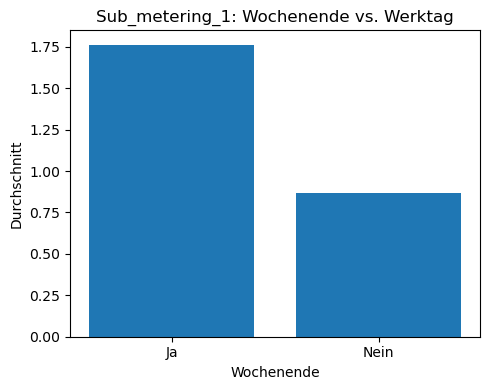

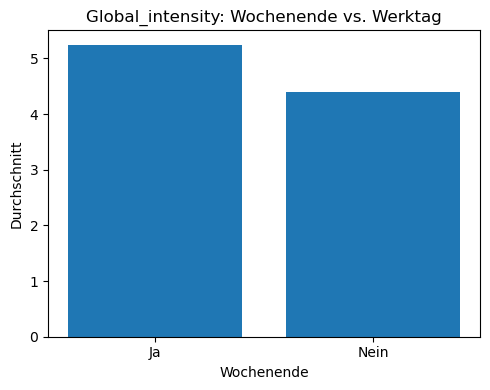

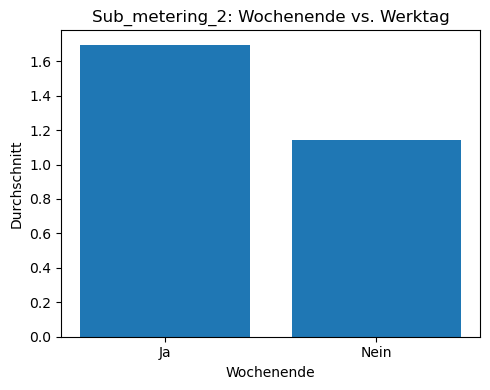

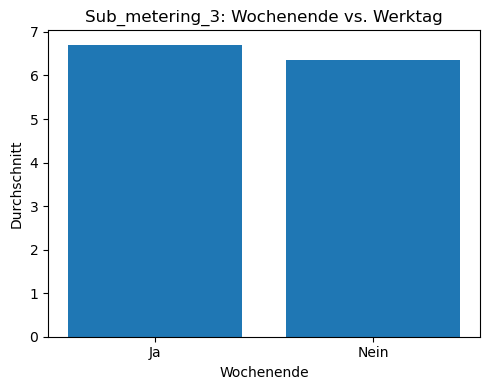

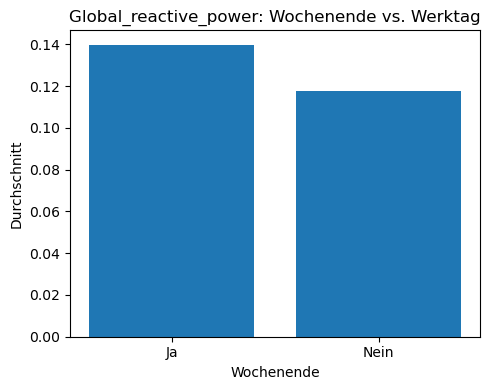

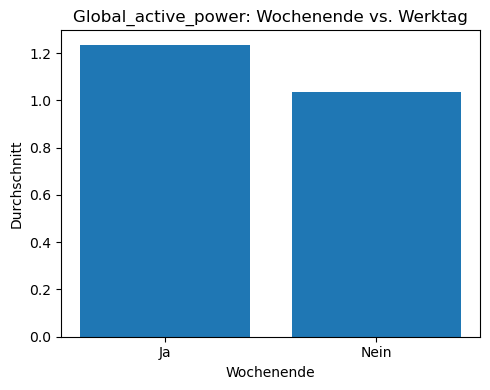

In [34]:
for feature in features:
    werte = df.groupby("Wochenende")[feature].mean()
    plt.figure(figsize=(5, 4))
    plt.bar(werte.index, werte.values)
    plt.title(f"{feature}: Wochenende vs. Werktag")
    plt.ylabel("Durchschnitt")
    plt.xlabel("Wochenende")
    plt.tight_layout()
    plt.show()


In [35]:
# Jahr extrahieren (nur falls noch nicht vorhanden)
if "Jahr" not in df.columns:
    df["Jahr"] = df["Datetime"].dt.year

# Wochenend-Erkennung (nur falls noch nicht vorhanden)
if "Wochentag" not in df.columns:
    df["Wochentag"] = df["Datetime"].dt.weekday

if "Wochenende" not in df.columns:
    df["Wochenende"] = df["Wochentag"].apply(lambda x: "Ja" if x >= 5 else "Nein")


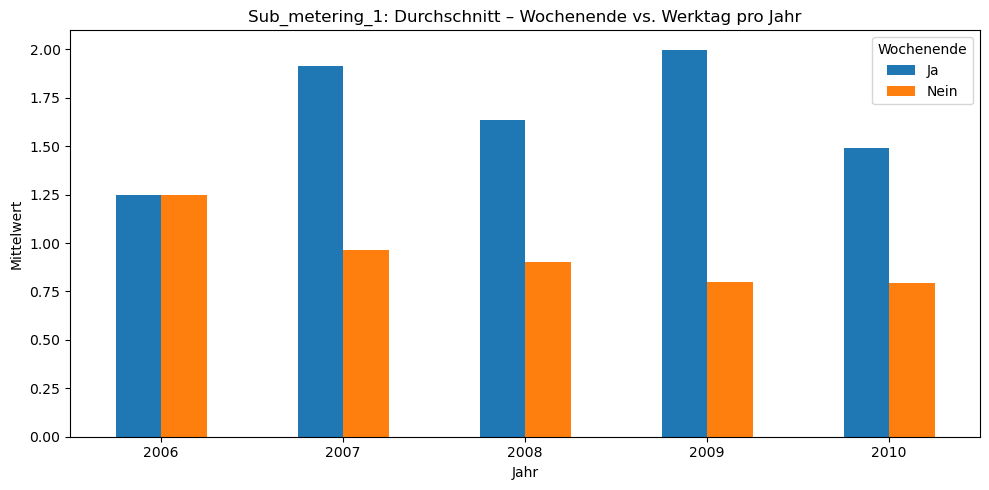

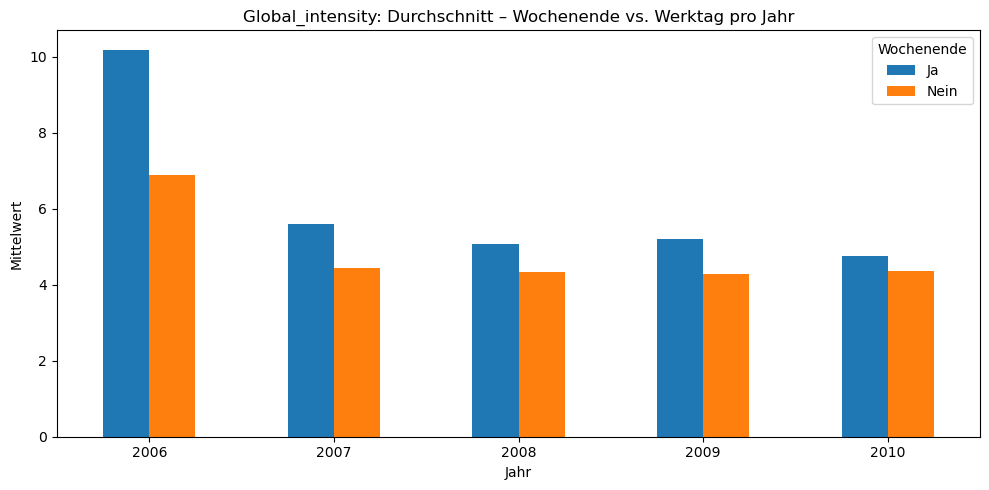

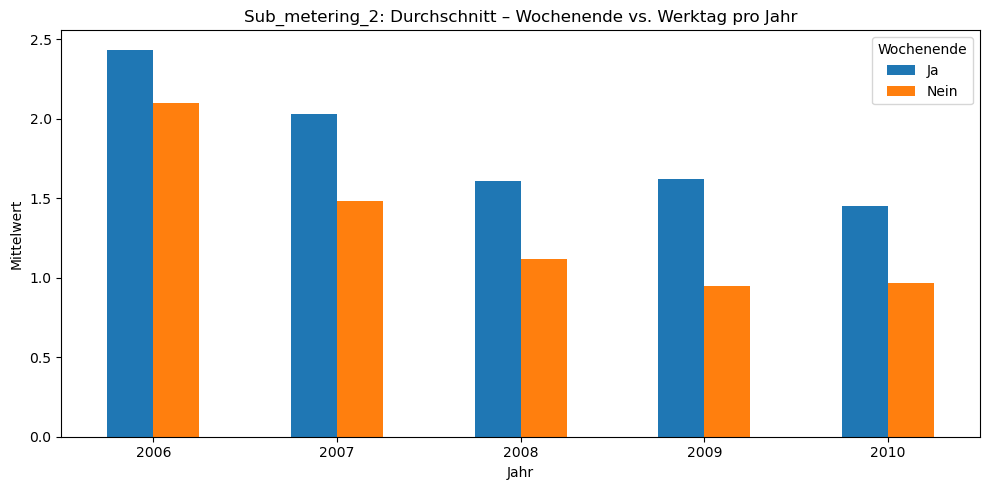

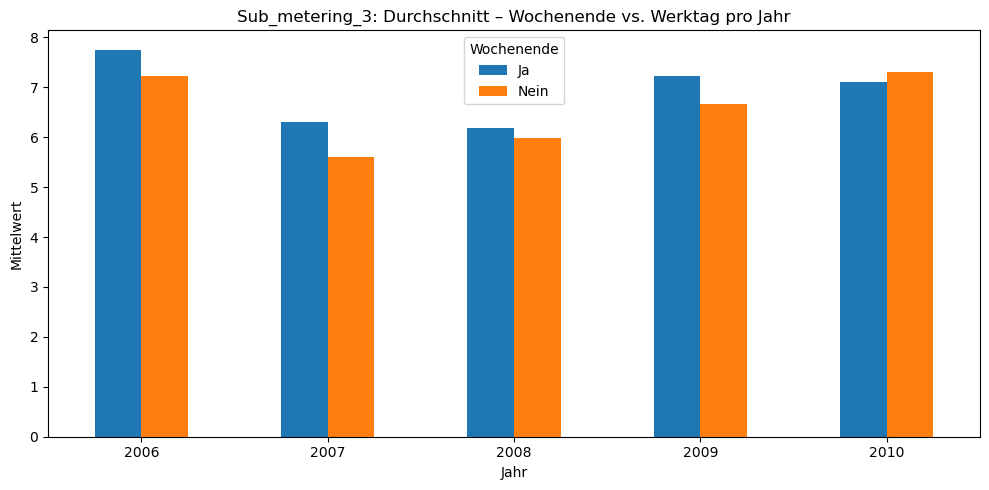

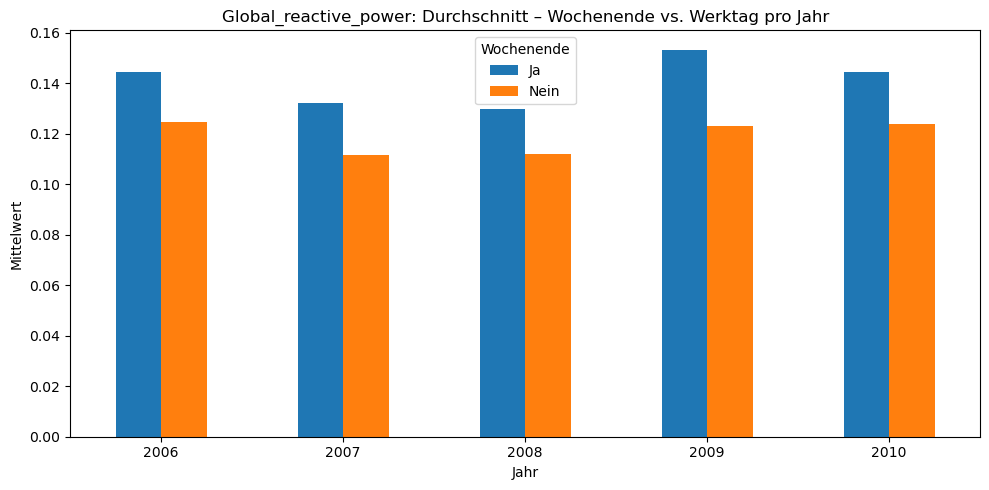

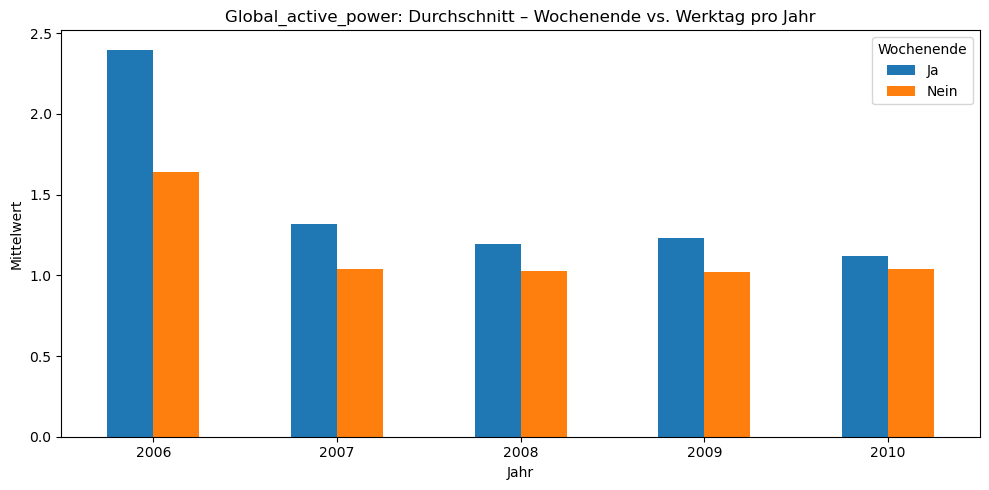

In [36]:
# Durchschnitt pro Feature, Jahr und Wochenendstatus
df_jahr_wochenende = df.groupby(["Jahr", "Wochenende"])[features].mean().reset_index()
for feature in features:
    pivot = df_jahr_wochenende.pivot(index="Jahr", columns="Wochenende", values=feature)
    
    # Plot
    pivot.plot(kind="bar", figsize=(10, 5))
    plt.title(f"{feature}: Durchschnitt – Wochenende vs. Werktag pro Jahr")
    plt.ylabel("Mittelwert")
    plt.xlabel("Jahr")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [41]:
"""for feature in features:
    pivot = df_jahr_wochenende.pivot(index="Jahr", columns="Wochenende", values=feature)
    
    plt.figure(figsize=(10, 5))
    for label in pivot.columns:
        plt.plot(pivot.index, pivot[label], marker="o", label=f"{"Wochenende" if label == "Ja" else "Werktag"}")
    
    plt.title(f"{feature}: Entwicklung Wochenende vs. Werktag (jährlich)")
    plt.xlabel("Jahr")
    plt.ylabel("Durchschnittlicher Wert")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(pivot.index)
    plt.tight_layout()
    plt.show()"""


'for feature in features:\n    pivot = df_jahr_wochenende.pivot(index="Jahr", columns="Wochenende", values=feature)\n\n    plt.figure(figsize=(10, 5))\n    for label in pivot.columns:\n        plt.plot(pivot.index, pivot[label], marker="o", label=f"{"Wochenende" if label == "Ja" else "Werktag"}")\n\n    plt.title(f"{feature}: Entwicklung Wochenende vs. Werktag (jährlich)")\n    plt.xlabel("Jahr")\n    plt.ylabel("Durchschnittlicher Wert")\n    plt.legend()\n    plt.grid(True, linestyle="--", alpha=0.5)\n    plt.xticks(pivot.index)\n    plt.tight_layout()\n    plt.show()'

#### Verteilung Pro Jahr und Pro Monat

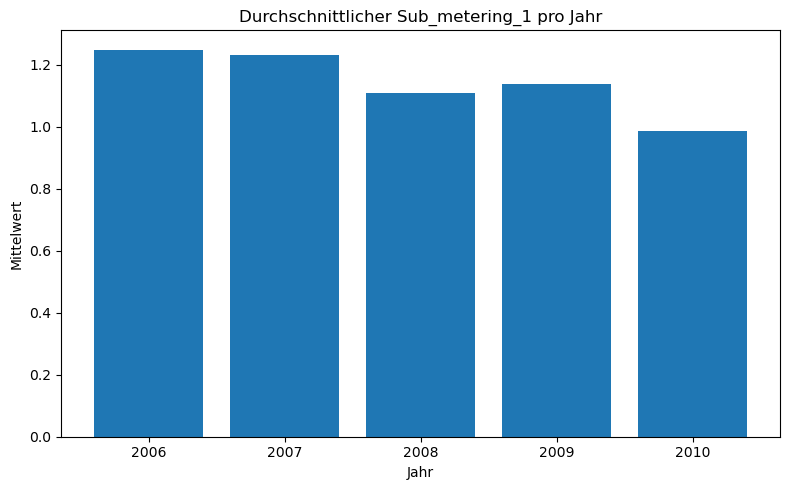

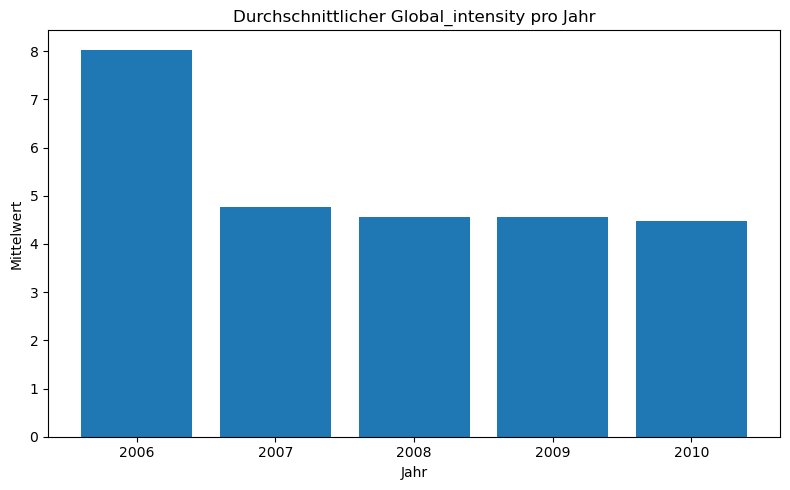

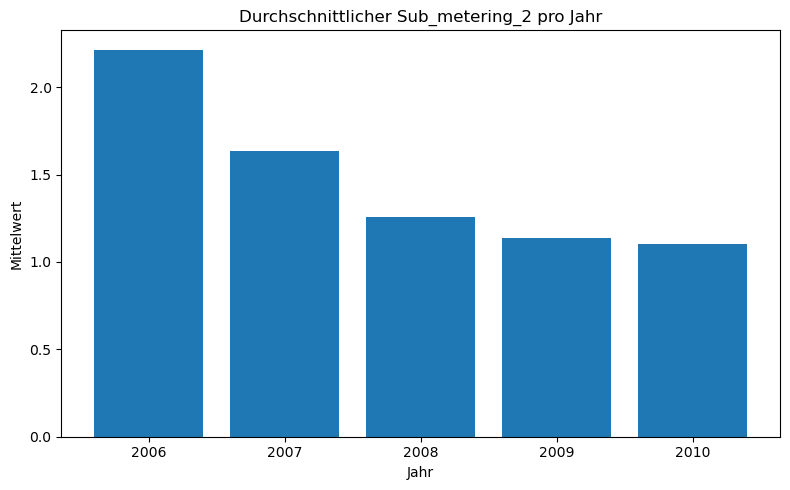

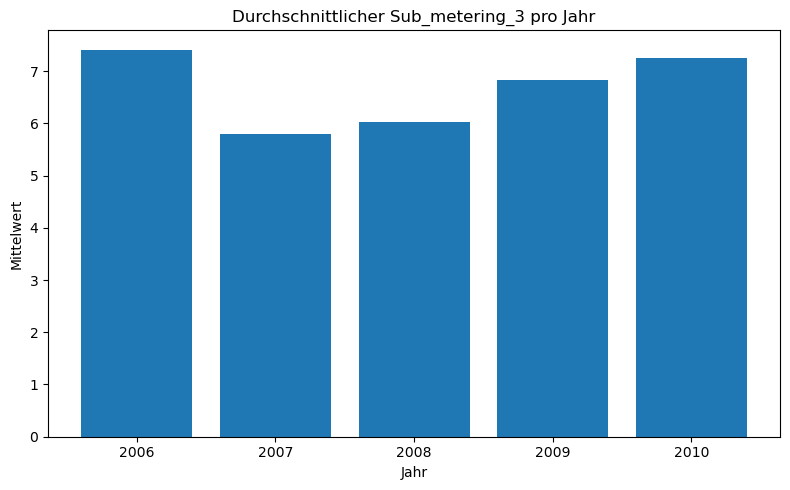

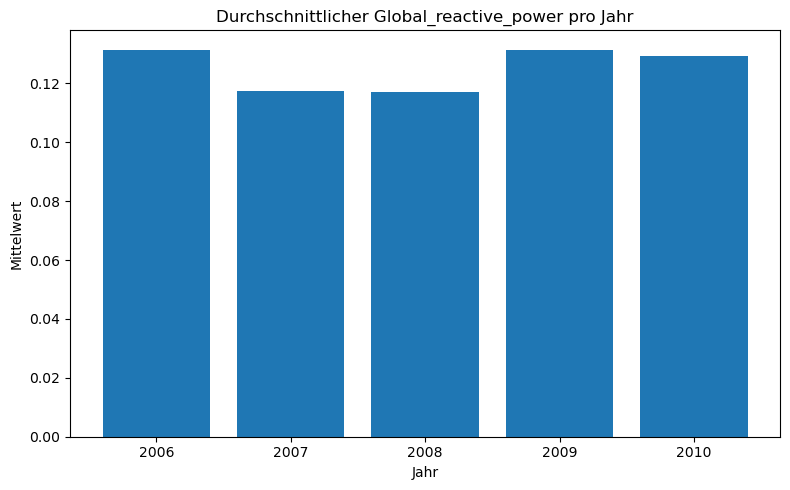

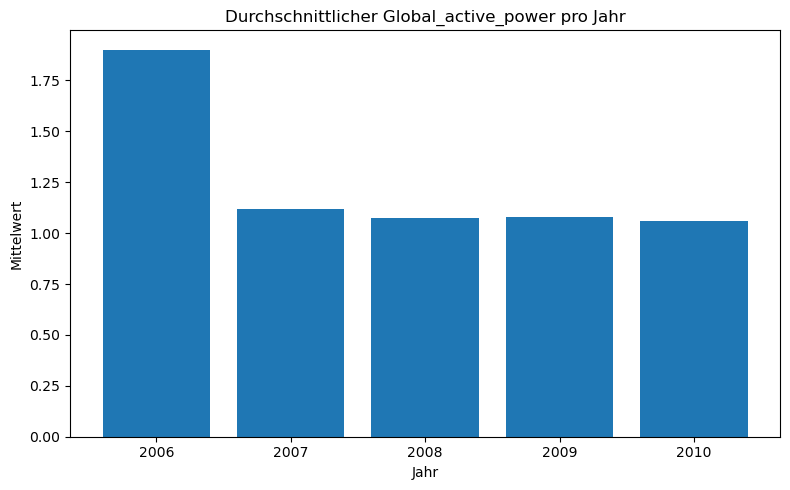

In [39]:
df["Jahr"] = df["Datetime"].dt.year
df["Monat"] = df["Datetime"].dt.month
df_jahr = df.groupby("Jahr")[features].mean().reset_index()
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.bar(df_jahr["Jahr"], df_jahr[feature])
    plt.title(f"Durchschnittlicher {feature} pro Jahr")
    plt.xlabel("Jahr")
    plt.ylabel("Mittelwert")
    plt.tight_layout()
    plt.show()


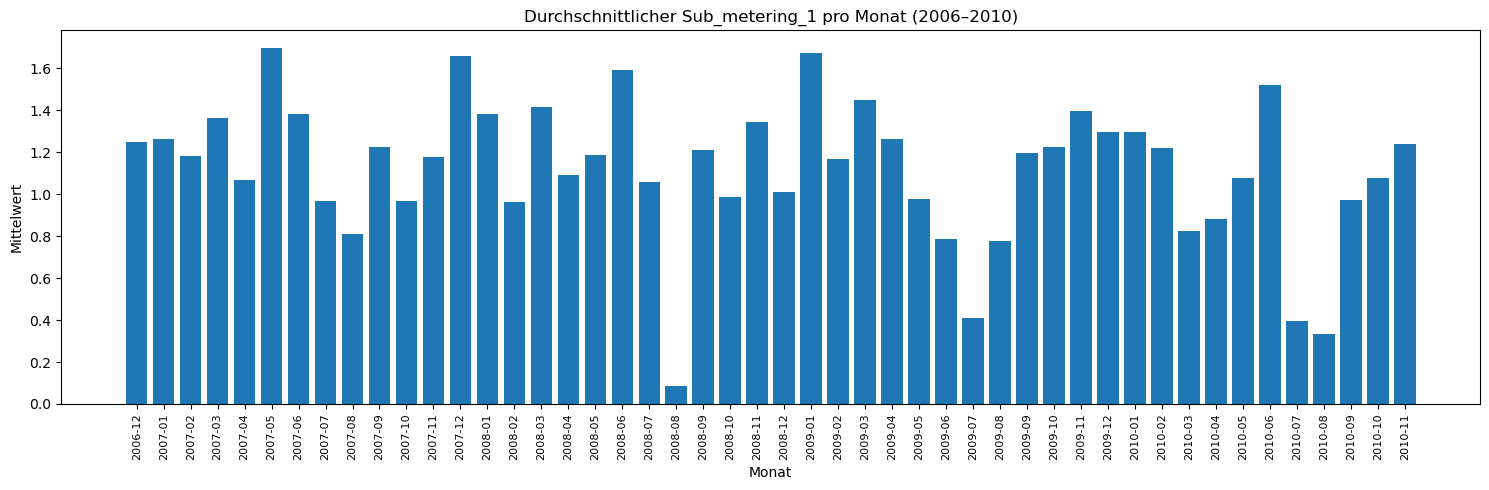

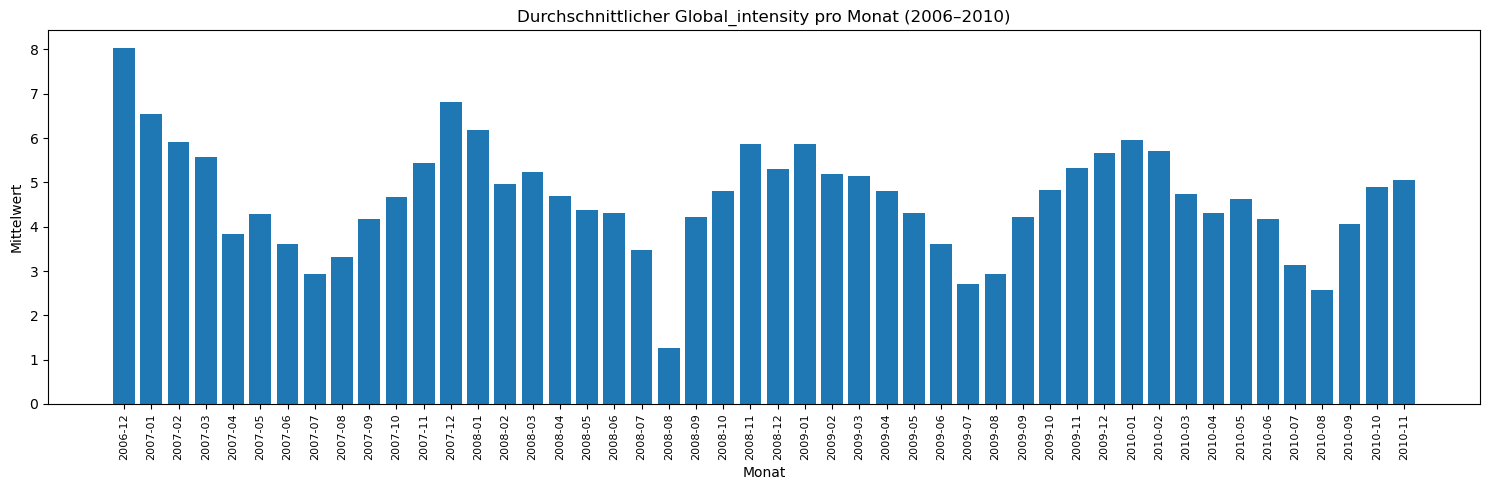

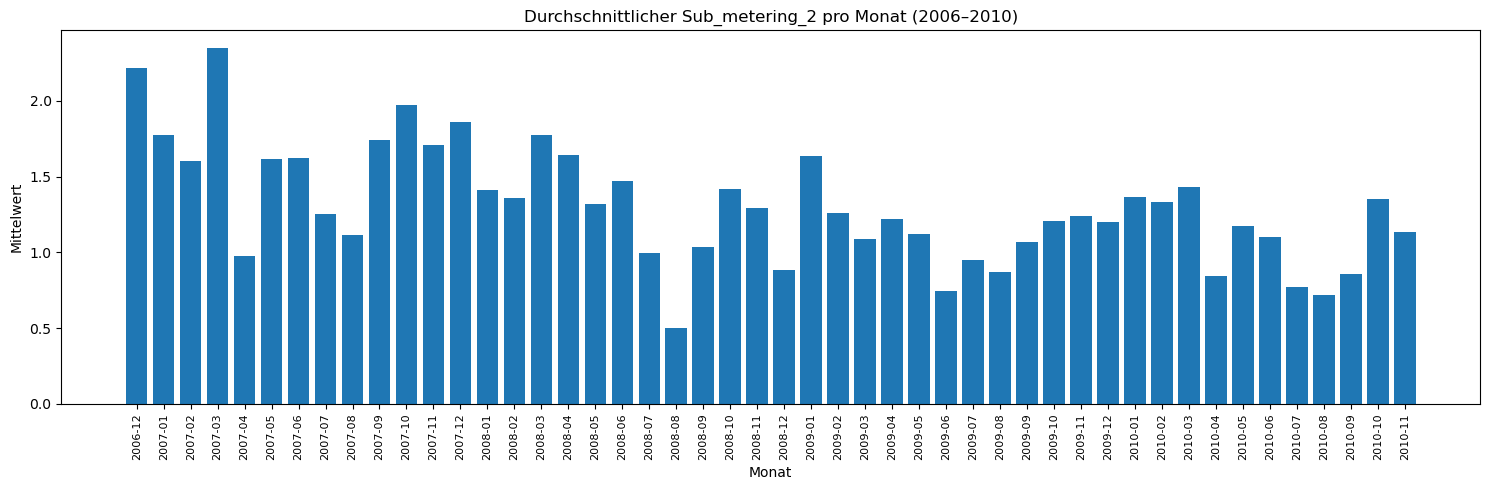

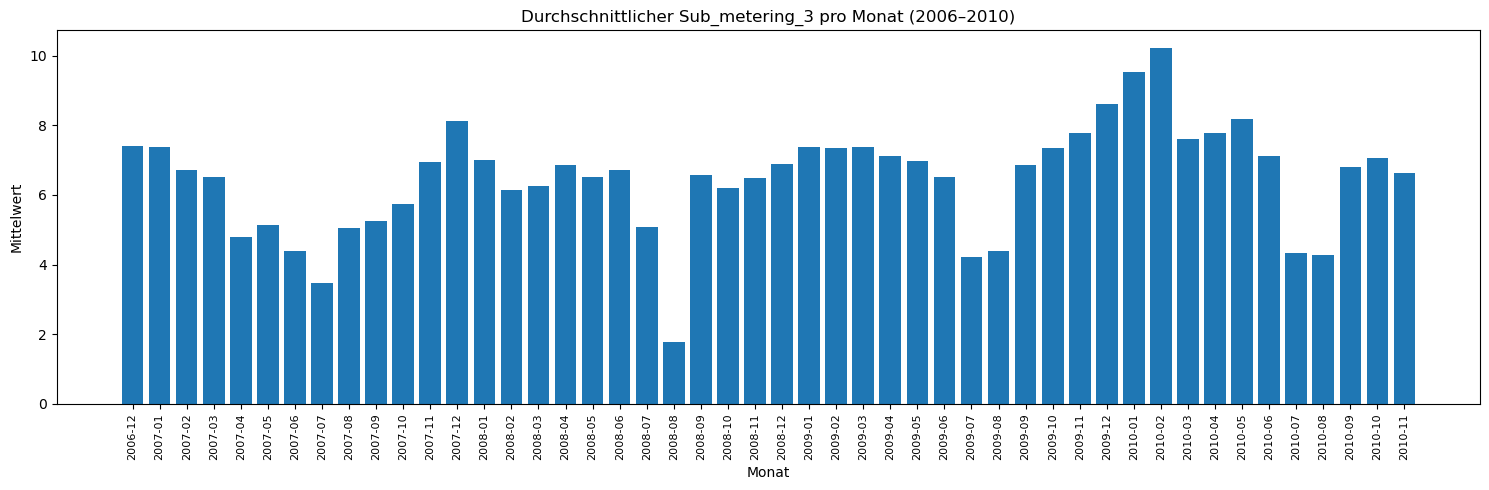

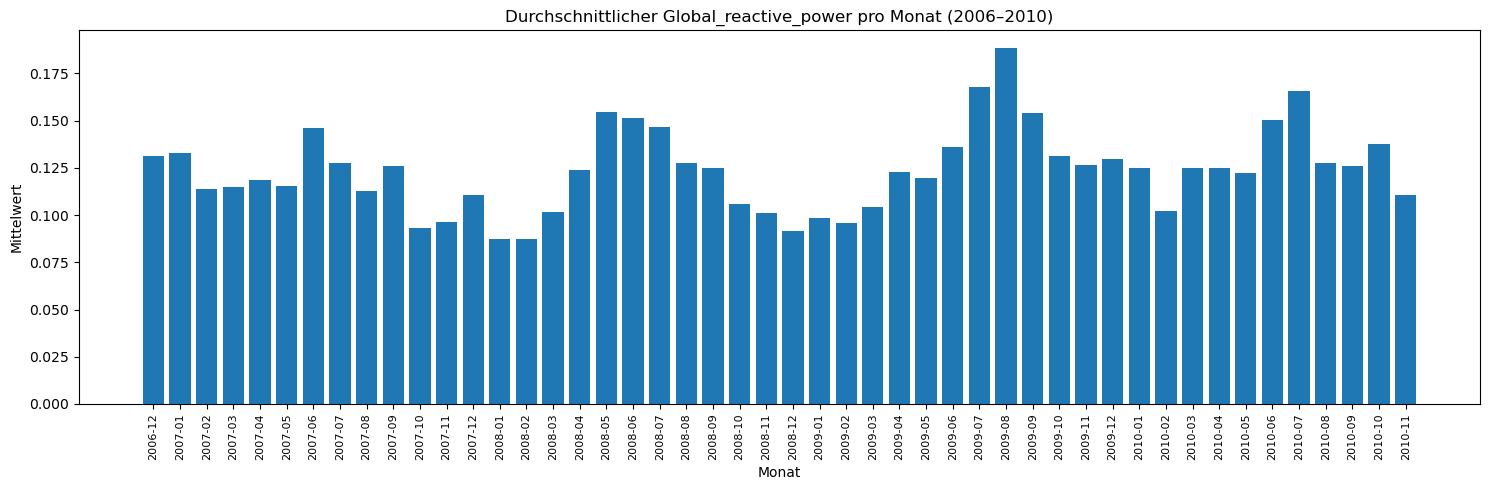

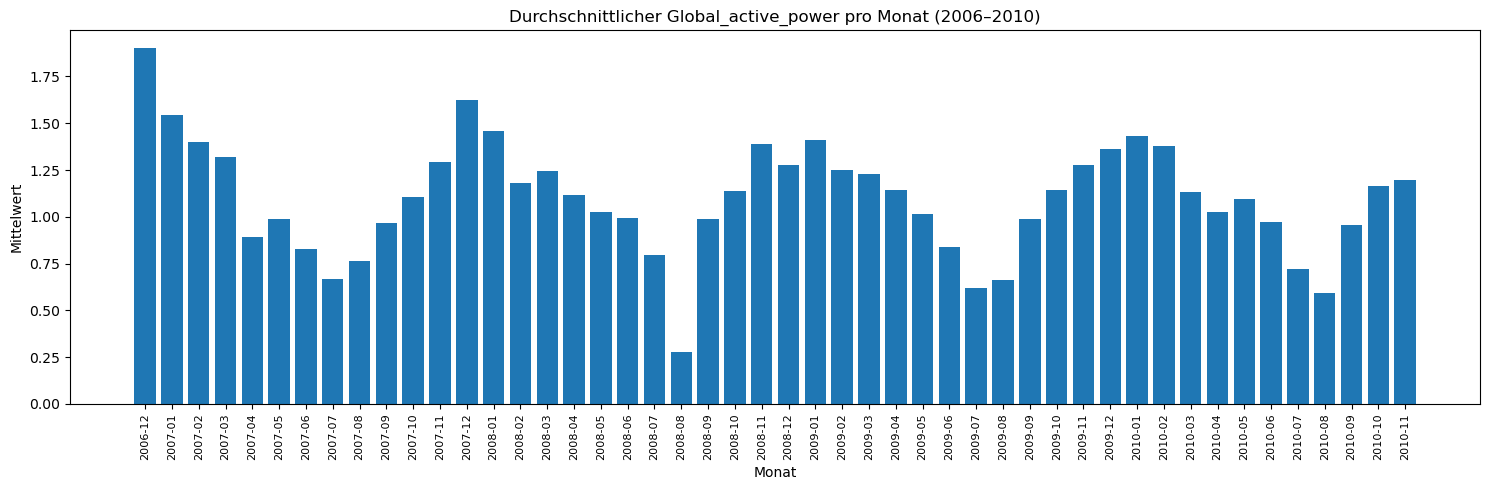

In [40]:
# Jahr + Monat im Format YYYY-MM (als String oder Period)
df["JahrMonat"] = df["Datetime"].dt.to_period("M").astype(str)
df_monatsverlauf = df.groupby("JahrMonat")[features].mean().reset_index()
for feature in features:
    plt.figure(figsize=(15, 5))
    plt.bar(df_monatsverlauf["JahrMonat"], df_monatsverlauf[feature])
    plt.title(f"Durchschnittlicher {feature} pro Monat (2006–2010)")
    plt.xlabel("Monat")
    plt.ylabel("Mittelwert")
    plt.xticks(rotation=90, fontsize=8)  # enge Ticks, weil 60 Monate
    plt.tight_layout()
    plt.show()


### Cleaning

Leeren werte werden im Schnitt des Monats X des Jahres X Zuzüglich des schnittes der Tageszeit ersetzt


In [42]:
import time

In [43]:

start_time = time.time()

# Relevante Features
features = [
    "Sub_metering_1", "Global_intensity", "Sub_metering_2",
    "Sub_metering_3", "Global_reactive_power", "Global_active_power", "Voltage"
]

# Nur Features mit NaNs
features_with_nans = [f for f in features if df[f].isna().any()]

# Nur Zeilen mit NaNs
df_missing = df[df[features_with_nans].isna().any(axis=1)]

# Gruppenspezifische Mittelwerte inkl. Wochenende
gruppen_mittelwerte = df.groupby(["Jahr", "Monat", "Tageszeit", "Wochenende"])[features_with_nans].mean()

# Statistikzähler
ersetzt_statistik = {feature: 0 for feature in features_with_nans}

# NaN-Ersetzung gezielt durchführen
for feature in features_with_nans:
    fehlkombis = df_missing[df_missing[feature].isna()][["Jahr", "Monat", "Tageszeit", "Wochenende"]].drop_duplicates()

    for _, row in fehlkombis.iterrows():
        jahr, monat, tageszeit, wochenende = row["Jahr"], row["Monat"], row["Tageszeit"], row["Wochenende"]

        try:
            ersatzwert = gruppen_mittelwerte.loc[(jahr, monat, tageszeit, wochenende), feature]
            if pd.notna(ersatzwert):
                maske = (
                    (df["Jahr"] == jahr) &
                    (df["Monat"] == monat) &
                    (df["Tageszeit"] == tageszeit) &
                    (df["Wochenende"] == wochenende) &
                    (df[feature].isna())
                )
                anz_ersetze = maske.sum()
                df.loc[maske, feature] = ersatzwert
                ersetzt_statistik[feature] += anz_ersetze
        except KeyError:
            continue

# Abschlussbericht
print("\n📊 Ersetzung abgeschlossen:")
for feature, count in ersetzt_statistik.items():
    print(f"  {feature}: {count} Werte ersetzt")

print(f"\n✅ Gesamtdauer: {round(time.time() - start_time, 2)} Sekunden")



📊 Ersetzung abgeschlossen:
  Sub_metering_1: 25979 Werte ersetzt
  Global_intensity: 25979 Werte ersetzt
  Sub_metering_2: 25979 Werte ersetzt
  Sub_metering_3: 25979 Werte ersetzt
  Global_reactive_power: 25979 Werte ersetzt
  Global_active_power: 25979 Werte ersetzt
  Voltage: 25979 Werte ersetzt

✅ Gesamtdauer: 258.2 Sekunden


### Durchschnittlicher Wochentag

In [44]:
import matplotlib.dates as mdates

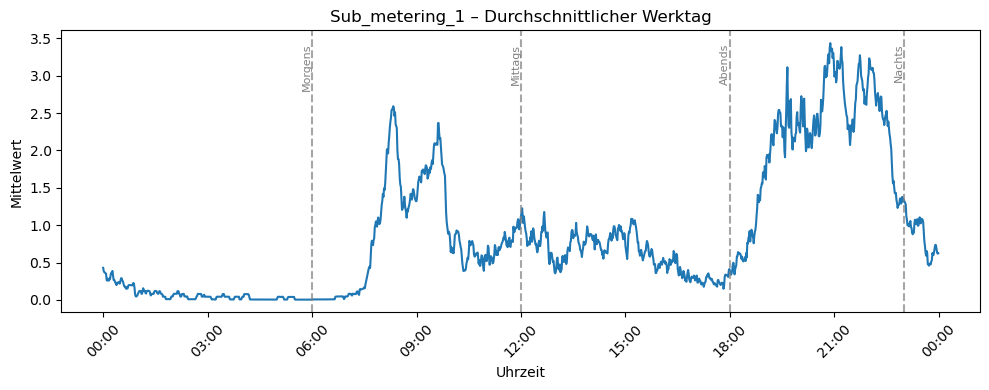

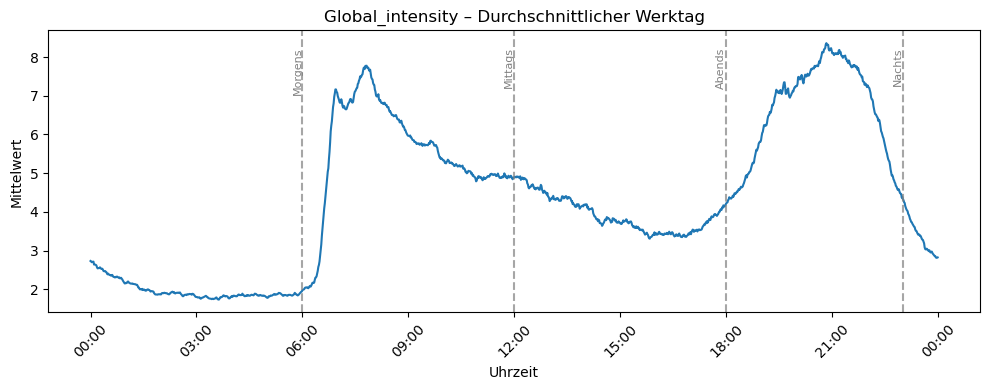

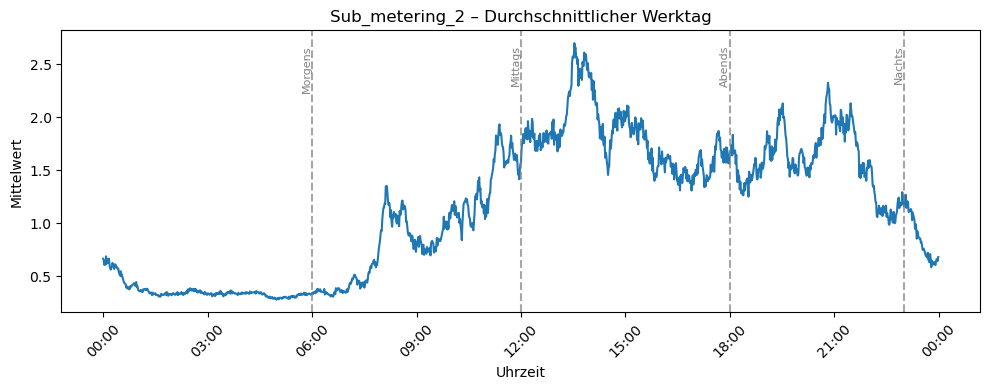

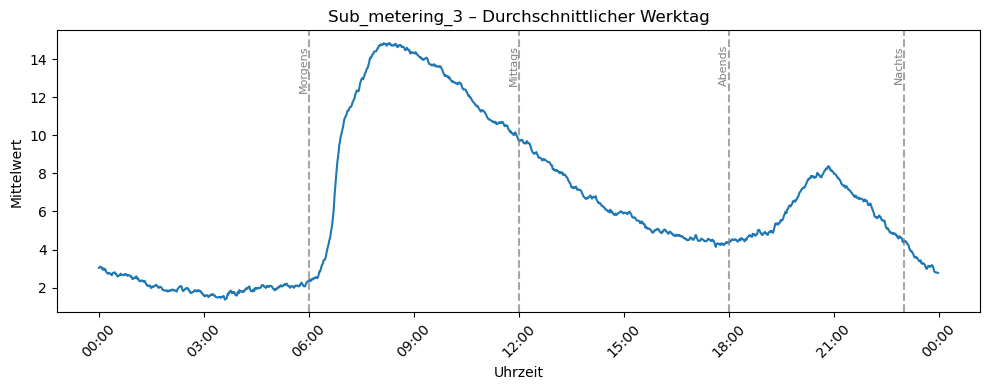

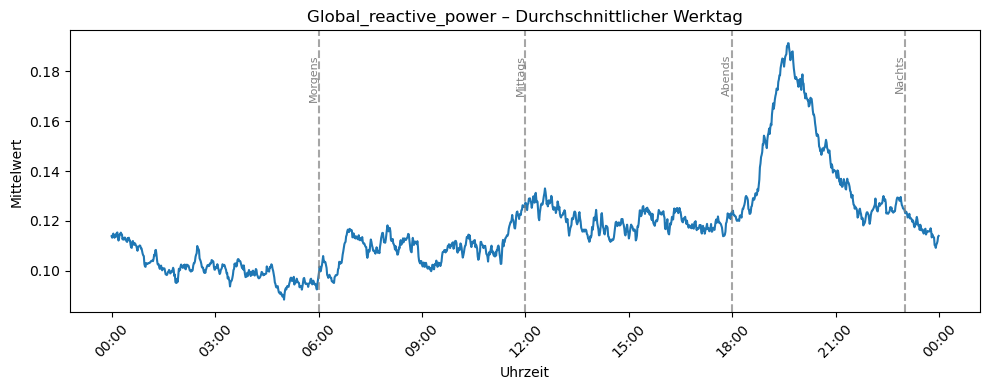

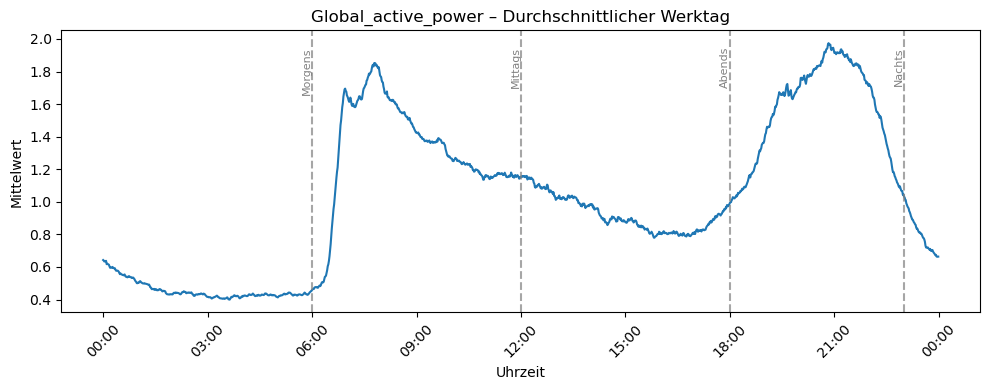

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_26136\2467437021.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


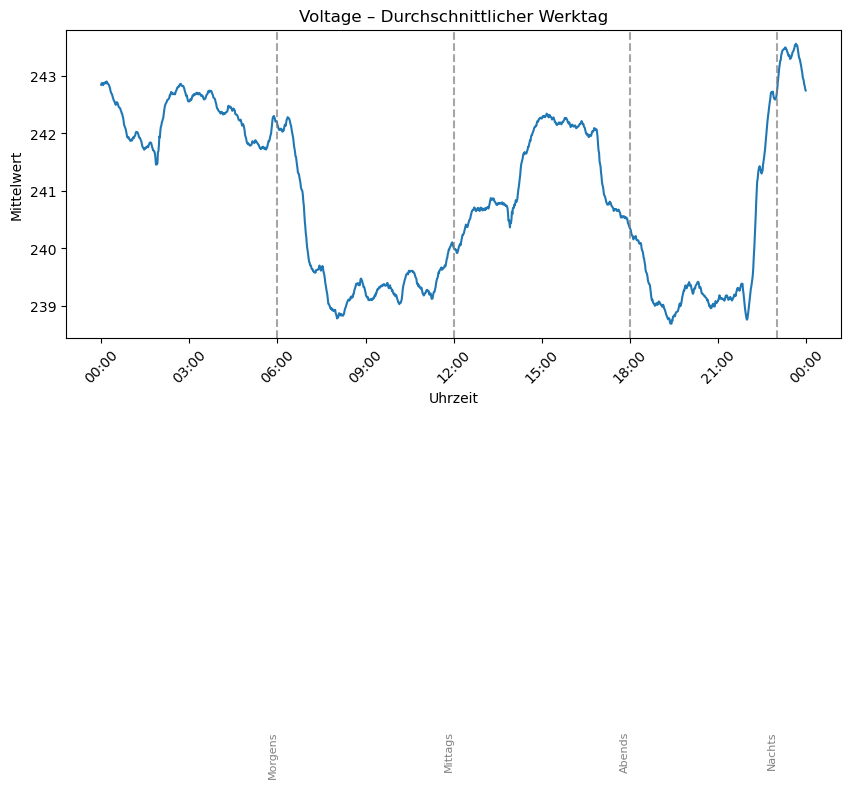

In [45]:
# 1. Nur Werktage filtern
df_werktag = df[df['Wochenende'] == 'Nein'].copy()

#2. Zeitspalte extrahieren
df_werktag['StundeMinute'] = df_werktag['Datetime'].dt.strftime('%H:%M')
df_werktag['StundeMinute_dt'] = pd.to_datetime(df_werktag['StundeMinute'], format='%H:%M')

# 3. Durchschnitt pro Uhrzeit berechnen (über alle Werktage)
df_avg = df_werktag.groupby('StundeMinute_dt')[features].mean().reset_index()

# 4. Tageszeit-Markierungen definieren
linienzeiten = ['06:00', '12:00', '18:00', '23:00']
tageszeiten = ['Morgens', 'Mittags', 'Abends', 'Nachts']
linienzeiten_dt = [pd.to_datetime(t, format='%H:%M') for t in linienzeiten]

# 5. Plot für jedes Feature
for feature in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df_avg['StundeMinute_dt'], df_avg[feature], label=f'Durchschnitt Werktag')
    
    # Vertikale Linien für Tageszeiten
    for zeit, label in zip(linienzeiten_dt, tageszeiten):
        plt.axvline(x=zeit, color='gray', linestyle='--', alpha=0.7)
        plt.text(zeit, plt.ylim()[1]*0.95, label, rotation=90, va='top', ha='right', fontsize=8, color='gray')

    plt.title(f'{feature} – Durchschnittlicher Werktag')
    plt.xlabel('Uhrzeit')
    plt.ylabel('Mittelwert')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.tight_layout()
    plt.show()


## Sauberen DF in CSV

In [47]:
#df.to_csv("household_power_consumption_clean.csv", index=False)

## Split in Train Valid Test

In [50]:
# Schritt 1: Split definieren
df_train = df[df['Jahr'] <= 2009]
df_valid = df[(df['Jahr'] == 2010) & (df['Monat'].between(1, 3))]
df_test  = df[(df['Jahr'] >= 2010) & (df['Monat'] >= 4)]

# Schritt 2: Anteile berechnen
gesamt = len(df)
n_train = len(df_train)
n_valid = len(df_valid)
n_test  = len(df_test)

print("Verteilung der Datensätze:")
print(f"  - Training:   {n_train} Zeilen ({n_train/gesamt:.2%})")
print(f"  - Validation: {n_valid} Zeilen ({n_valid/gesamt:.2%})")
print(f"  - Test:       {n_test} Zeilen ({n_test/gesamt:.2%})")
print(f"  Gesamt:     {gesamt} Zeilen")

Verteilung der Datensätze:
  - Training:   1600236 Zeilen (77.11%)
  - Validation: 129600 Zeilen (6.25%)
  - Test:       345423 Zeilen (16.64%)
  Gesamt:     2075259 Zeilen


In [51]:
df_train.to_csv('household_train.csv', index=False)
df_valid.to_csv('household_validation.csv', index=False)
df_test.to_csv('household_test.csv', index=False)